In [72]:
import pandas as pd


df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env_final_v8.csv")
print(f"Num rows: {len(df)}")
df.head()

Num rows: 1063947


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
0,4724.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0
1,4709.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.007874,35.925000,-115.117000,2.822266,265.75,277.25,...,18.129263,17.823468,9.114583,0.0,1.659570,5.281450,3.429616,3280.064761,249.988458,0.0
2,4564.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,35.305114,21.909930,8.794788,0.0,2.739051,6.916189,3.836471,2990.476711,259.677833,0.0
3,4779.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,30.685404,18.030886,8.794788,0.0,2.890112,7.008753,3.871680,3020.788279,288.870042,0.0
4,4724.0,2021-01-23 23:14:00+00:00,2021-01-24 00:14:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0


In [53]:
at_least_one_pos_precip_mask = (df['gauge_acc_in'] >= 0.04) | (df['mrms_q3evap_qpe'] >= 0.04)
df_non_zero = df[at_least_one_pos_precip_mask]

print(f"# Data points  : {len(df)}")
print(f"# Unique gauges: {len(set(df['gauge_idx']))}")
print("---------------------------------------------------------")
print(f"# Data points   w/ 1+ value >= 0.04: {len(df_non_zero)}")
print(f"# Unique gauges w/ 1+ value >= 0.04: {len(set(df_non_zero['gauge_idx']))}")

# Data points  : 1063947
# Unique gauges: 220
---------------------------------------------------------
# Data points   w/ 1+ value >= 0.04: 385998
# Unique gauges w/ 1+ value >= 0.04: 220


In [54]:
# df_non_zero["day"] = df_non_zero["start_datetime_utc"].apply(lambda s: s.split(" ")[0])

In [55]:
# df_non_zero[["day", "gauge_idx", "gauge_acc_in", "mrms_q3evap_qpe", "lat", "lon", "DCAPE"]].groupby("day")

In [56]:
# set(df_non_zero["day"]).__len__()

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt


mrms_bias = np.array(df["mrms_q3evap_qpe"] - df["gauge_acc_in"])
random.seed(42)
random.shuffle(mrms_bias)

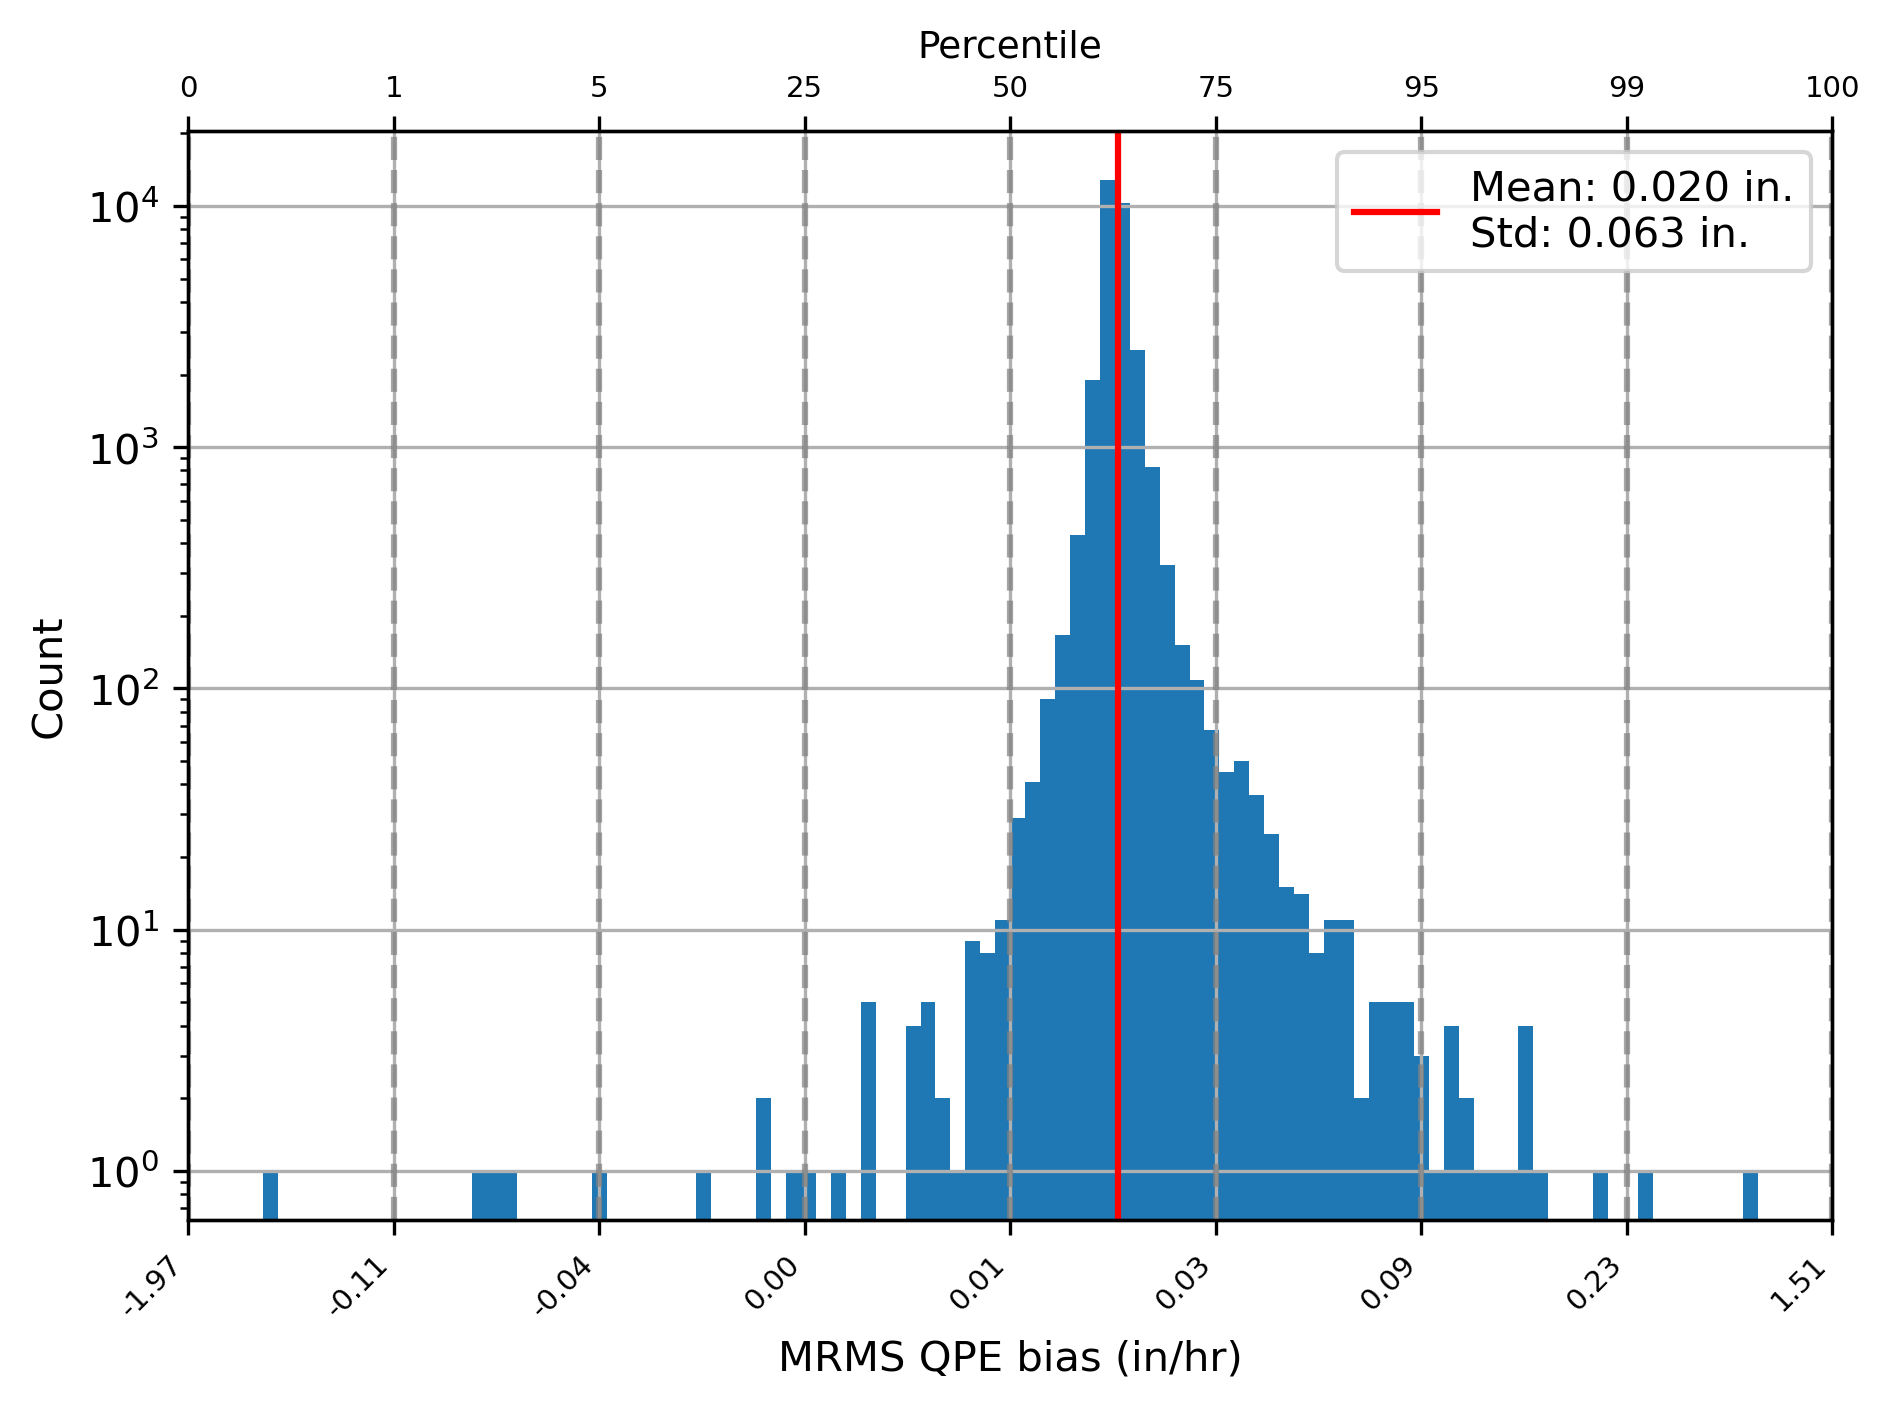

In [71]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(dpi=300)
arr = mrms_bias[:30000]

ax.hist(arr, bins=100, log=True)
ax.axvline(np.mean(arr), color='red', linestyle='-', 
           label=f'Mean: {arr.mean():.3f} in.\nStd: {arr.std():.3f} in.')

# Define percentile boundaries
percentile_values = [0, 1, 5, 25, 50, 75, 95, 99, 100]

# Calculate actual data values at each percentile
actual_percentile_data_values = [np.percentile(arr, p) for p in percentile_values]

# Get x-axis limits
xlim = ax.get_xlim()

# Use evenly spaced positions for both axes and vertical lines
evenly_spaced_positions = np.linspace(xlim[0], xlim[1], len(percentile_values))

# Plot vertical lines at EVENLY SPACED positions (aligned with tick labels)
for pos in evenly_spaced_positions:
    ax.axvline(pos, color='gray', linestyle='--', alpha=0.7)

# Create secondary x-axis for percentile labels (evenly spaced)
ax2 = ax.twiny()
ax2.set_xlim(xlim)
ax2.set_xticks(evenly_spaced_positions)
ax2.set_xticklabels([f'{p}' for p in percentile_values], fontsize=7)
ax2.set_xlabel("Percentile", fontsize=9)

# Update PRIMARY x-axis to show actual data values at percentile positions
ax.set_xticks(evenly_spaced_positions)
ax.set_xticklabels([f'{val:.2f}' for val in actual_percentile_data_values], 
                   fontsize=7, rotation=45, ha='right')

ax.set_xlabel("MRMS QPE bias (in/hr)")
ax.set_ylabel("Count")
ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

# Bias Regimes
***
- $\beta = R_{\text{mrms}} - R$

- Extreme underestimation (--)
    - $ \beta \le -0.5$
- Underestimation (-)
    - $ -0.5 \lt \beta \le -0.1 $
- No bias (*)
    - $ -0.1 \lt \beta  \le 0.1 $
- Overestimation (+)
    - $ 0.1 \lt \beta \le 0.5  $
- Extreme overestimation (++)
    - $ 0.5 \lt \beta $


In [8]:
bias = df_non_zero['mrms_q3evap_qpe'] - df_non_zero['gauge_acc_in']

df_non_zero['mrms_bias_category'] = pd.cut(
    bias,
    bins=[-np.inf, -0.5, -0.10, 0.10, 0.5, np.inf],
    labels=[
        "extreme_underestimation",
        "underestimation",
        "no_bias",
        "overestimation",
        "extreme_overestimation"
    ]
)

/var/folders/r0/bvy3clwn5xqgrmr1sh2z1c0h0000gn/T/ipykernel_69765/1099256209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['mrms_bias_category'] = pd.cut(


In [9]:
df_non_zero.groupby("mrms_bias_category").count()

/var/folders/r0/bvy3clwn5xqgrmr1sh2z1c0h0000gn/T/ipykernel_69765/1398131809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_non_zero.groupby("mrms_bias_category").count()


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
mrms_bias_category,,,,,,,,,,,,,,,,,,,,,
extreme_underestimation,519,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519
underestimation,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,...,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482
no_bias,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735,...,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735
overestimation,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169,...,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169
extreme_overestimation,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,...,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093


In [10]:
import numpy as np

columns  = list(df.columns)
features = columns[7: -1]
ccs = []

for feat in features:
    X = df[feat]
    y = df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    # y = df["gauge_acc_in"] # df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    print(f"{feat}: {np.corrcoef(X, y)[0, 1]:.3f}")
    ccs.append((feat, np.corrcoef(X, y)[0, 1]))

700mb_UGRD: -0.051
850mb_DPT: 0.103
850mb_TMP: 0.146
850mb_HGT: 0.018
2m_above_ground_TMP: 0.153
925mb_DPT: 0.090
entire_atmosphere_single_layer_PWAT: 0.002
500mb_TMP: 0.119
700mb_DPT: 0.126
700mb_TMP: 0.134
500mb_DPT: 0.100
700mb_HGT: -0.002
850mb_UGRD: -0.039
700mb_VGRD: -0.028
highest_tropospheric_freezing_level_HGT: 0.092
surface_PRES: -0.012
level_of_adiabatic_condensation_from_sfc_HGT: 0.065
850mb_VGRD: -0.015
2m_above_ground_DPT: 0.075
surface_theta_e: 0.155
lowest_100mb_mean_mixing_ratio: 0.077
925mb_700mb_DPT: 0.112
850mb_700mb_DPT: 0.117
850mb_500mb_DPT: 0.119
LCL_LFC_RH: 0.051
0-3km_RH: -0.018
0-5km_RH: 0.040
low_level_lapse_rate: 0.087
3hr_lapse_rate_change: 0.002
sfc_850_pw: 0.051
sfc_700_pw: 0.087
850_700_mean_wind: -0.044
LCL_height: 0.138
DCAPE: 0.152


In [11]:
ccs = sorted(ccs, key=lambda x:x[1])

In [12]:
ccs.__len__()

34

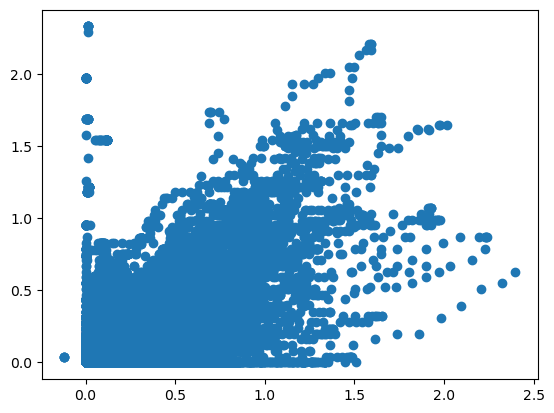

In [13]:
x = df["mrms_q3evap_qpe"]
y = df["gauge_acc_in"]
plt.scatter(x, y);

In [14]:
ccs[::-1].__len__()

34

In [15]:
for i in range(10):
    cat, val = ccs[i]
    print(f"{cat}: {val:.3f}")

700mb_UGRD: -0.051
850_700_mean_wind: -0.044
850mb_UGRD: -0.039
700mb_VGRD: -0.028
0-3km_RH: -0.018
850mb_VGRD: -0.015
surface_PRES: -0.012
700mb_HGT: -0.002
entire_atmosphere_single_layer_PWAT: 0.002
3hr_lapse_rate_change: 0.002


In [16]:
import sklearn as skl
from sklearn.linear_model import LinearRegression


df_non_zero = df

X = np.array([
    df_non_zero["surface_theta_e"],
    df_non_zero["2m_above_ground_TMP"],
    df_non_zero["DCAPE"],
    df_non_zero["850mb_TMP"],
    df_non_zero["LCL_height"],
    df_non_zero["700mb_TMP"],
    df_non_zero["700mb_DPT"],
    df_non_zero["500mb_TMP"],
    df_non_zero["850mb_500mb_DPT"],
    df_non_zero["850mb_700mb_DPT"],
    df_non_zero["925mb_700mb_DPT"],
    df_non_zero["850mb_DPT"],
    df_non_zero["500mb_DPT"],
    df_non_zero["highest_tropospheric_freezing_level_HGT"],
    df_non_zero["925mb_DPT"],
    df_non_zero["low_level_lapse_rate"],
    df_non_zero["sfc_700_pw"],
    df_non_zero["lowest_100mb_mean_mixing_ratio"],
    df_non_zero["2m_above_ground_DPT"],
    df_non_zero["level_of_adiabatic_condensation_from_sfc_HGT"],
    df_non_zero["sfc_850_pw"],
    df_non_zero["LCL_LFC_RH"],
    df_non_zero["0-5km_RH"],
    df_non_zero["850mb_HGT"],
    df_non_zero["3hr_lapse_rate_change"],
    df_non_zero["entire_atmosphere_single_layer_PWAT"],
    df_non_zero["700mb_HGT"],
    df_non_zero["surface_PRES"],
    df_non_zero["850mb_VGRD"],
    df_non_zero["0-3km_RH"],
    df_non_zero["700mb_VGRD"],
    df_non_zero["850mb_UGRD"],
    df_non_zero["850_700_mean_wind"],
    df_non_zero["700mb_UGRD"],
    df_non_zero["mrms_q3evap_qpe"],
    # df_non_zero["gauge_acc_in"],
]).T

y = np.array(df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])

reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_

(0.3549811260950837,
 array([ 3.20652403e-03,  5.33362118e-03,  7.69924581e-06, -2.39561812e-04,
        -6.35802133e-05, -7.15339345e-04,  6.85966860e-03,  6.85268217e-04,
         1.82467790e-02, -6.77766117e-02,  5.45213672e-02,  2.79480518e-03,
        -4.85695220e-03, -8.86876903e-07, -7.60889222e-03,  1.97081231e-03,
         7.32078476e-04, -4.87977382e-03, -9.91065799e-03,  1.70636426e-06,
        -4.46961065e-04,  1.36638353e-04,  5.08308368e-05, -1.25125795e-06,
        -2.81554402e-05, -4.77248533e-09, -1.40743861e-06, -2.18543545e-06,
        -6.35497824e-04, -1.53535940e-04, -5.54017397e-04, -2.66874226e-04,
         1.38490325e-03, -4.81381871e-04,  4.40019318e-01]))

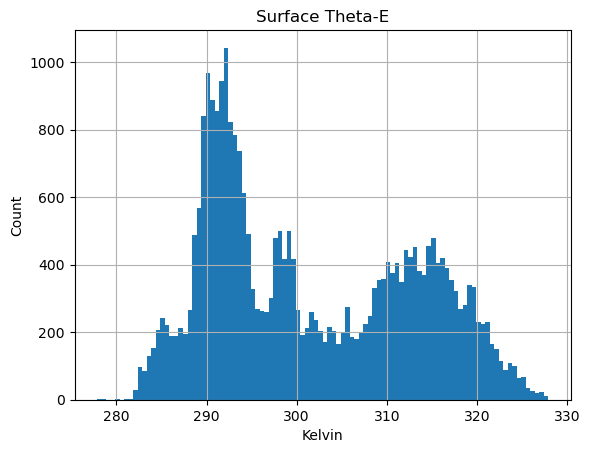

In [17]:
surface_theta_e_arr = np.array(df_non_zero["surface_theta_e"])
random.shuffle(surface_theta_e_arr)


plt.xlabel("Kelvin")
plt.ylabel("Count")
plt.grid()
plt.title("Surface Theta-E")
plt.hist(surface_theta_e_arr[:30000], bins=100);

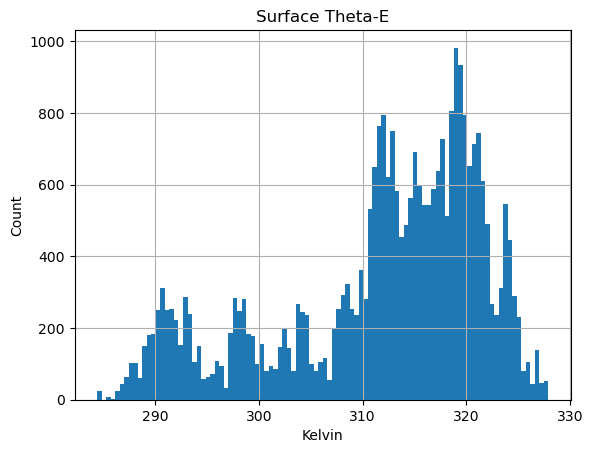

In [18]:
# where bias > 0.25 in

bias = (df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])
mask = ~(bias < 0.1) & (bias > -0.1)

surface_theta_e_arr = np.array(df_non_zero[mask]["surface_theta_e"])
random.shuffle(surface_theta_e_arr)


plt.xlabel("Kelvin")
plt.ylabel("Count")
plt.grid()
plt.title("Surface Theta-E")
plt.hist(surface_theta_e_arr[:30000], bins=100);

### bias measurements

$$
\text{Bias} (Z) = 100 \frac{ZR - m}{m} 
$$
- $ZR$: deterministic MRMS QPE reflectivity
    - $f(Z) \mapsto R$
- $m$: "conditional mean of the reference distribution"
- Source (Kirstetter Et. al 2015): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014WR015672

$$
\text{Bias}(Z) = 100 \frac{ZR - m}{m}
$$

$$
\text{Uncertainty}(Z) = 100 \frac{q75 - q25}{m}
$$

- The only difference in our case is the values of $m$ are supplied by CCRFCD

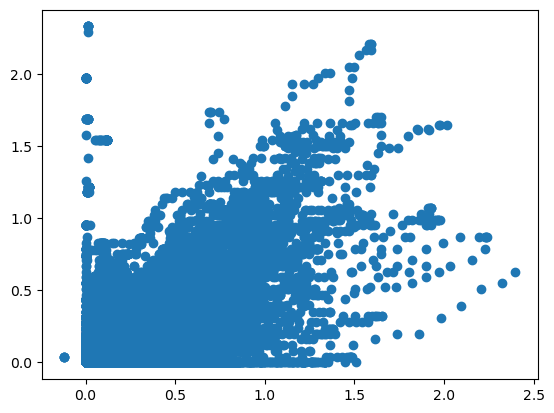

In [19]:
ZR  = df_non_zero["mrms_q3evap_qpe"]
ref = df_non_zero["gauge_acc_in"]

# want to calculate m
plt.scatter(ZR, ref);

In [20]:
df_non_zero["gauge_acc_in_round"] = df_non_zero["gauge_acc_in"].apply(lambda x: round(x, 1))

In [21]:
df_non_zero[["gauge_acc_in_round","mrms_q3evap_qpe"]].groupby("gauge_acc_in_round").count()[:100]

/var/folders/r0/bvy3clwn5xqgrmr1sh2z1c0h0000gn/T/ipykernel_69765/3274858512.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_non_zero[["gauge_acc_in_round","mrms_q3evap_qpe"]].groupby("gauge_acc_in_round").count()[:100]


,mrms_q3evap_qpe
gauge_acc_in_round,
0.0,944881
0.1,85835
0.2,20915
0.3,4251
0.4,3069
0.5,1687
0.6,1011
0.7,583
0.8,467


# bias/uncertainty est.
---

In [22]:
N_GROUPS = 100

import warnings
warnings.simplefilter("ignore")

subset = df[["gauge_acc_in","mrms_q3evap_qpe"]]
subset = subset[subset["gauge_acc_in"] > 0]

# to handle tiebreaks
subset["jitt_mrms_q3evap_qpe"] = subset["mrms_q3evap_qpe"] + np.random.uniform(1e-9, 5e-9, len(subset))
subset["jitt_gauge_acc_in"]    = subset["gauge_acc_in"]    + np.random.uniform(1e-9, 5e-9, len(subset))

subset["group"] = pd.qcut(subset["jitt_gauge_acc_in"], q=N_GROUPS, duplicates='drop')
subset.groupby("group").count()

,gauge_acc_in,mrms_q3evap_qpe,jitt_mrms_q3evap_qpe,jitt_gauge_acc_in
group,,,,
"(0.010000000910000001, 0.03000000192]",2983,2983,2983,2983
"(0.03000000192, 0.03000000296]",2983,2983,2983,2983
"(0.03000000296, 0.03000000402]",2982,2982,2982,2982
"(0.03000000402, 0.040000001]",2983,2983,2983,2983
"(0.040000001, 0.04000000108]",2983,2983,2983,2983
...,...,...,...,...
"(0.2300000037, 0.2700000025]",2983,2983,2983,2983
"(0.2700000025, 0.320000002]",2983,2983,2983,2983
"(0.320000002, 0.4300000014]",2982,2982,2982,2982


Line of best fit: y = -81.9723x + 23.3650


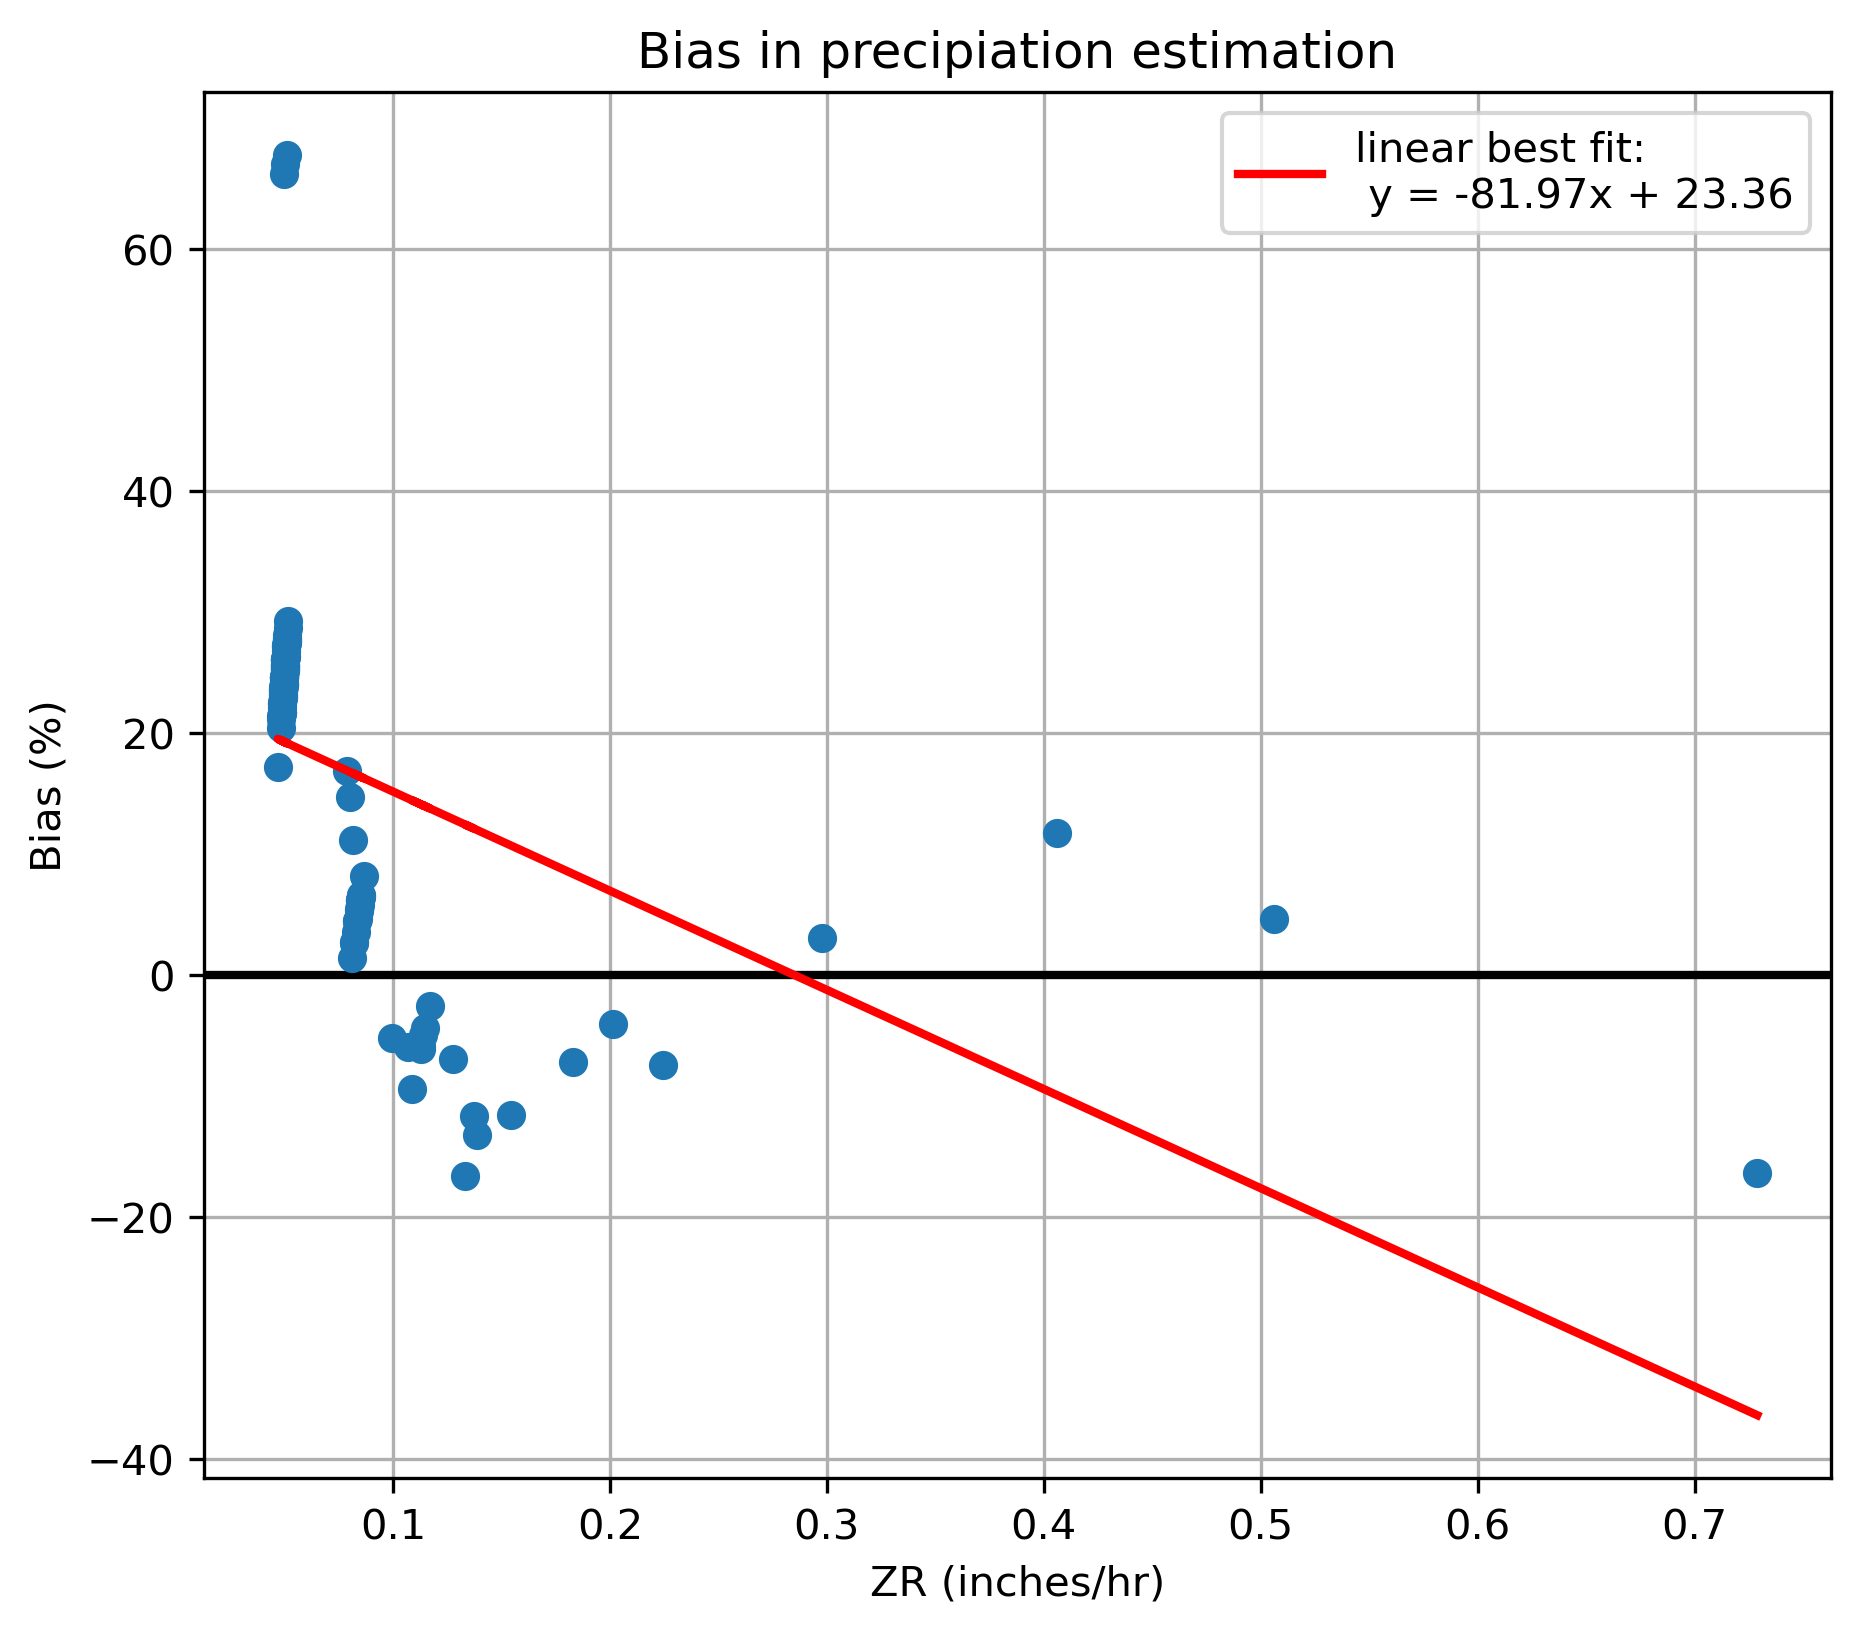

In [23]:
bias_df = subset.groupby("group").mean()

# note: index by [1: ] to avoid DB0
m      = np.array(bias_df["jitt_gauge_acc_in"])[1:]
ZR     = np.array(bias_df["mrms_q3evap_qpe"])[1:]
bias_z = np.array(100 * ((ZR - m) / m))

slope, intercept = np.polyfit(ZR, bias_z, 1)
fit_line = slope * ZR + intercept

fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

ax.axhline(y=0.0, color='black', linewidth=2)
ax.scatter(ZR, bias_z, zorder=3)
ax.plot(ZR, fit_line, color='red', linewidth=2,
        label=f'linear best fit:\n y = {slope:.2f}x + {intercept:.2f}', zorder=4)

# ax.set_ylim(-75, 75)

ax.set_title("Bias in precipiation estimation")
ax.set_xlabel("ZR (inches/hr)")
ax.set_ylabel("Bias (%)")
ax.grid(True)
ax.legend()

print(f"Line of best fit: y = {slope:.4f}x + {intercept:.4f}")

Line of best fit: y = -81.9723x + 23.3650


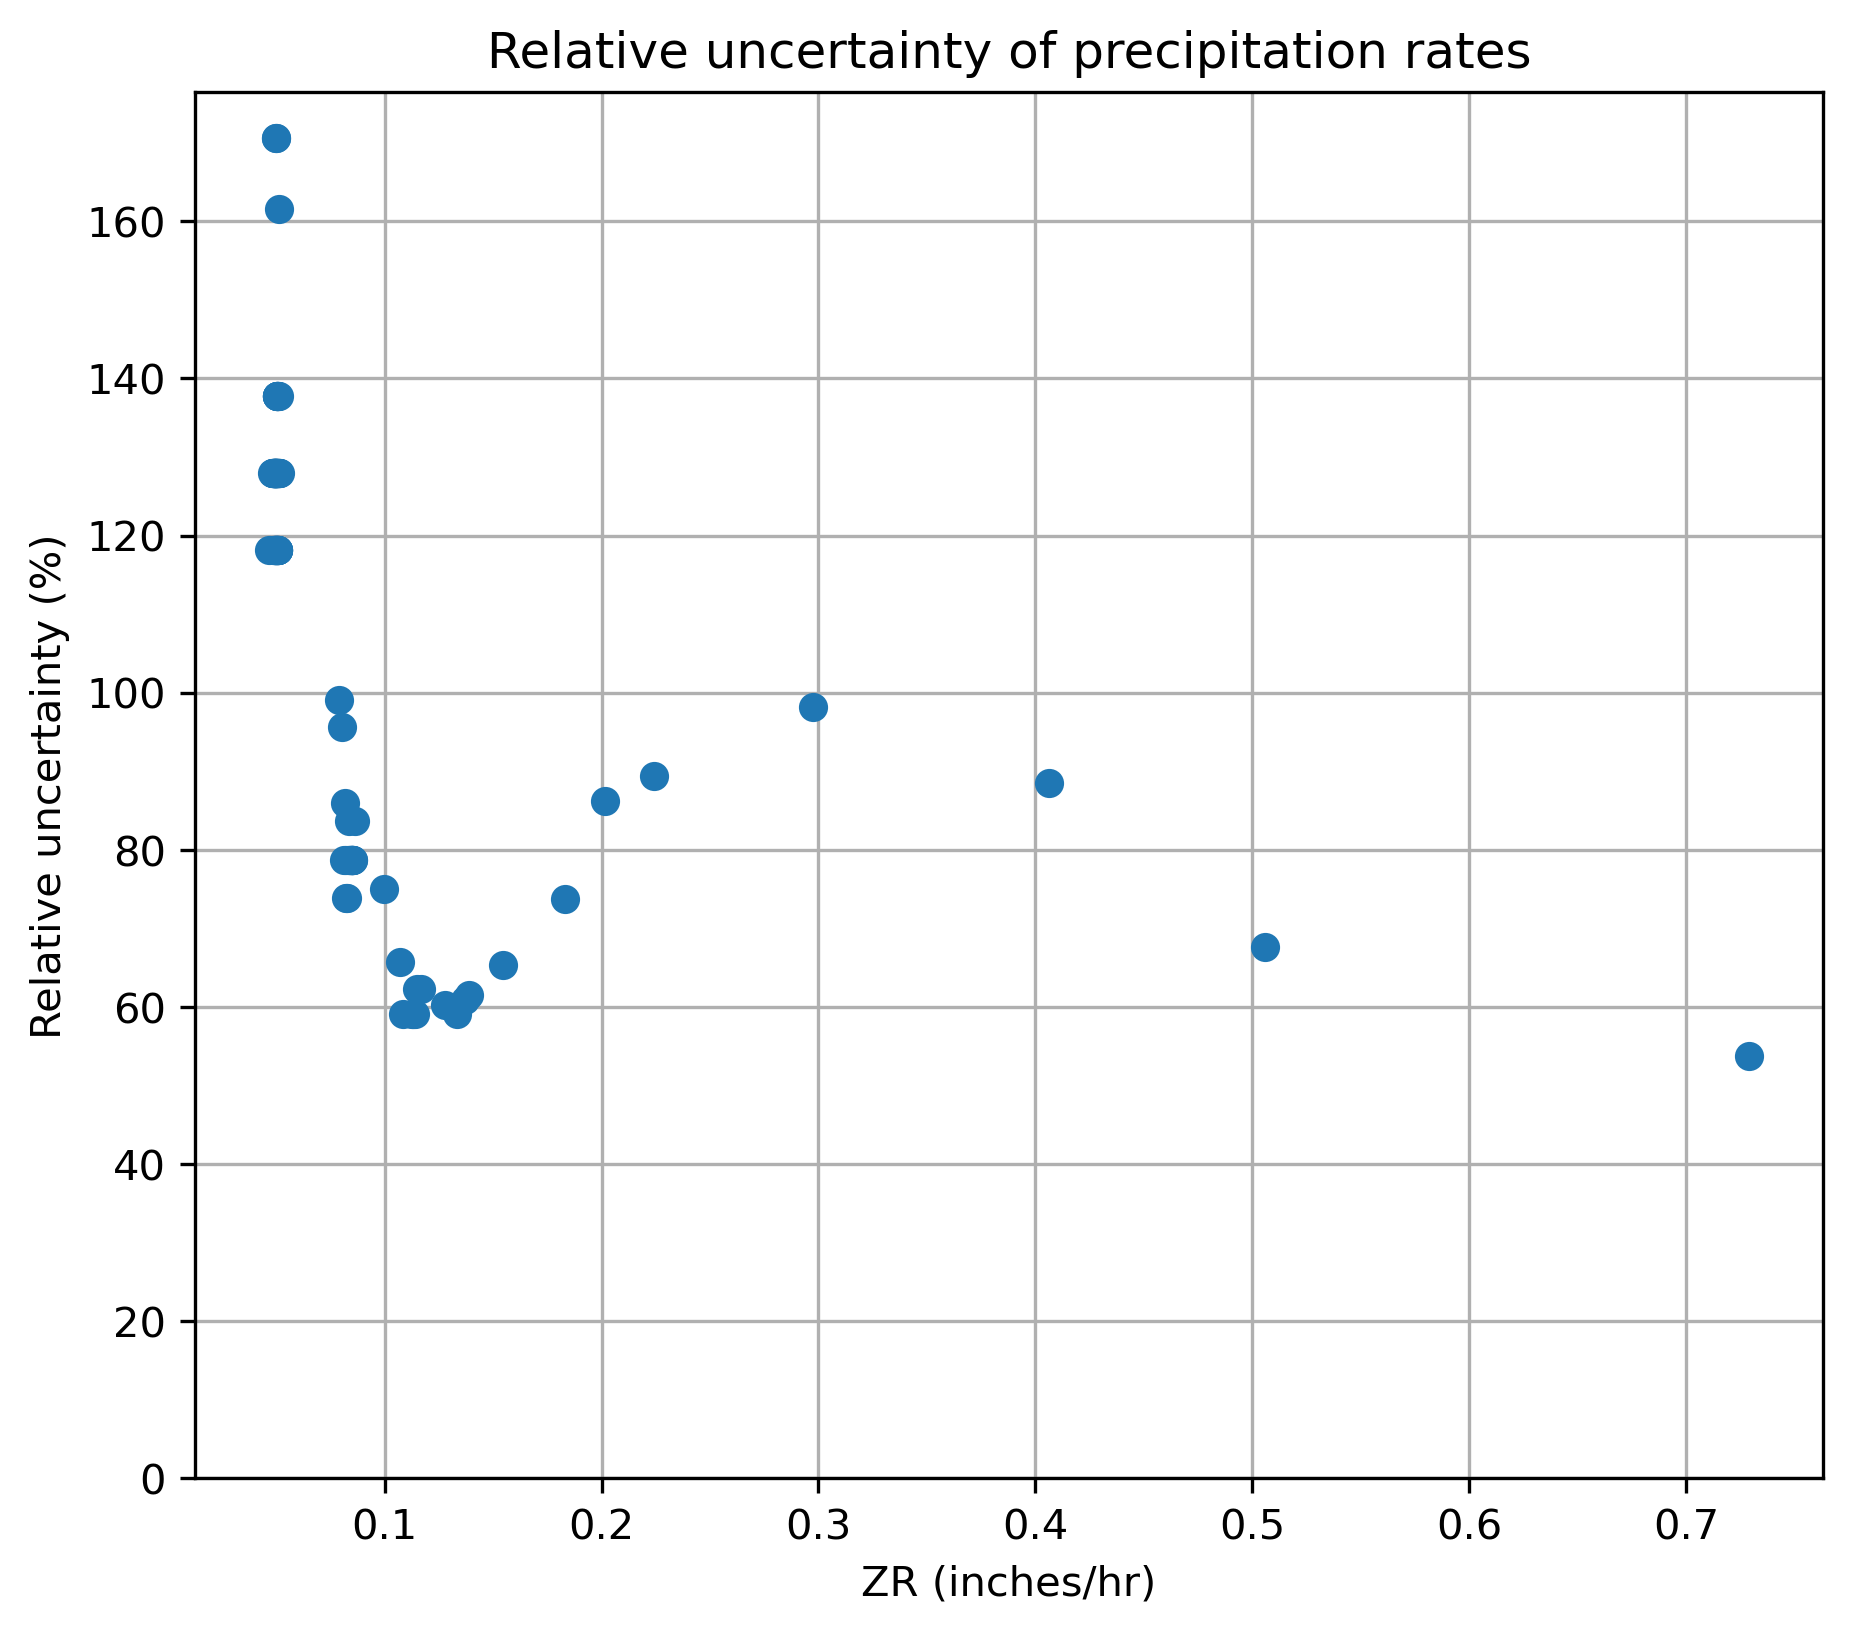

In [24]:
bias_df = subset.groupby("group").mean()

# note: index by [1: ] to avoid DB0
m             = np.array(bias_df["gauge_acc_in"])[1:]
Q_25          = np.array(subset.groupby("group").quantile(.25)["mrms_q3evap_qpe"])[1:]
Q_75          = np.array(subset.groupby("group").quantile(.75)["mrms_q3evap_qpe"])[1:]
uncertainty_z = np.array(100 * ((Q_75 - Q_25) / m))

# slope, intercept = np.polyfit(ZR, bias_z, 1)
# fit_line = slope * ZR + intercept

fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

# ax.axhline(y=0.0, color='black', linewidth=2)
ax.scatter(ZR, uncertainty_z, zorder=3)

# ax.plot(ZR, fit_line, color='red', linewidth=2,
#         label=f'linear best fit:\n y = {slope:.2f}x + {intercept:.2f}', zorder=4)
# ax.set_ylim(-75, 75)

ax.set_xlabel("ZR (inches/hr)")
ax.set_ylabel("Relative uncertainty (%)")
ax.set_ylim(0)

ax.set_title("Relative uncertainty of precipitation rates")
ax.grid(True)

print(f"Line of best fit: y = {slope:.4f}x + {intercept:.4f}")

# univariate analysis

In [25]:
columns_to_keep = [
    "surface_theta_e",
    "2m_above_ground_TMP",
    "DCAPE",
    "850mb_TMP",
    "LCL_height",
    "700mb_TMP",
    "700mb_DPT",
    "500mb_TMP",
    "850mb_500mb_DPT",
    "850mb_700mb_DPT",
    "925mb_700mb_DPT",
    "850mb_DPT",
    "500mb_DPT",
    "highest_tropospheric_freezing_level_HGT",
    "925mb_DPT",
    "low_level_lapse_rate",
    "sfc_700_pw",
    "lowest_100mb_mean_mixing_ratio",
    "2m_above_ground_DPT",
    "level_of_adiabatic_condensation_from_sfc_HGT",
    "sfc_850_pw",
    "LCL_LFC_RH",
    "0-5km_RH",
    "850mb_HGT",
    "3hr_lapse_rate_change",
    "entire_atmosphere_single_layer_PWAT",
    "700mb_HGT",
    "surface_PRES",
    "850mb_VGRD",
    "0-3km_RH",
    "700mb_VGRD",
    "850mb_UGRD",
    "850_700_mean_wind",
    "700mb_UGRD",
    "mrms_q3evap_qpe",
    "gauge_acc_in"  # include target variable
]


df_subset         = df_non_zero[columns_to_keep]
absolute_bias     = df_subset["mrms_q3evap_qpe"] - df_subset["gauge_acc_in"]
df_subset["bias"] = absolute_bias

In [26]:
correlations = df_subset.corr("spearman")["bias"].drop("bias").sort_values(key=abs, ascending=False)
print(correlations)

mrms_q3evap_qpe                                 0.597859
gauge_acc_in                                   -0.310121
surface_theta_e                                 0.140861
2m_above_ground_TMP                             0.131650
850mb_500mb_DPT                                 0.129598
850mb_TMP                                       0.129309
500mb_DPT                                       0.128800
700mb_TMP                                       0.127196
700mb_DPT                                       0.124030
entire_atmosphere_single_layer_PWAT             0.121457
850mb_700mb_DPT                                 0.118985
925mb_700mb_DPT                                 0.117600
highest_tropospheric_freezing_level_HGT         0.116042
500mb_TMP                                       0.115209
700mb_HGT                                       0.113555
850mb_DPT                                       0.111797
925mb_DPT                                       0.107874
lowest_100mb_mean_mixing_ratio 

# fit + explain non-linear models

In [27]:
columns_to_keep = [
    # "start_datetime_utc", # for testing
    "surface_theta_e",
    "2m_above_ground_TMP",
    "DCAPE",
    "850mb_TMP",
    "LCL_height",
    "700mb_TMP",
    "700mb_DPT",
    "500mb_TMP",
    "850mb_500mb_DPT",
    "850mb_700mb_DPT",
    "925mb_700mb_DPT",
    "850mb_DPT",
    "500mb_DPT",
    "highest_tropospheric_freezing_level_HGT",
    "925mb_DPT",
    "low_level_lapse_rate",
    "sfc_700_pw",
    "lowest_100mb_mean_mixing_ratio",
    "2m_above_ground_DPT",
    "level_of_adiabatic_condensation_from_sfc_HGT",
    "sfc_850_pw",
    "LCL_LFC_RH",
    "0-5km_RH",
    "850mb_HGT",
    "3hr_lapse_rate_change",
    "entire_atmosphere_single_layer_PWAT",
    "700mb_HGT",
    "surface_PRES",
    "850mb_VGRD",
    "0-3km_RH",
    "700mb_VGRD",
    "850mb_UGRD",
    "850_700_mean_wind",
    "700mb_UGRD",
    "mrms_q3evap_qpe",
    "gauge_acc_in"  # include target variable
]

df_subset         = df[columns_to_keep]
absolute_bias     = df_subset["mrms_q3evap_qpe"] - df_subset["gauge_acc_in"]
df_subset["bias"] = absolute_bias

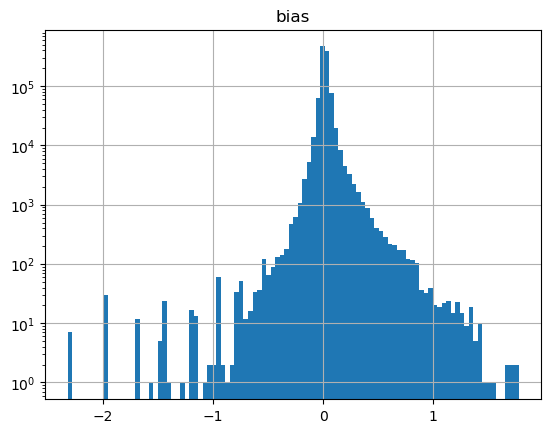

In [37]:
df_subset.hist("bias", bins=100, log=True);

# light gradient-boosting regressor

In [42]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


X = df_subset.drop(columns=["bias", "gauge_acc_in"])
y = df_subset["bias"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = lgb.LGBMRegressor(
    boosting_type="rf",
    n_estimators=1000,           # more trees (with early stopping)
    learning_rate=0.05,         # lower rate often helps
    num_leaves=31,
    max_depth=12,                # control overfitting
    # min_child_samples=20,       # minimum samples per leaf
    subsample=0.8,              # row subsampling
    colsample_bytree=0.8,       # feature subsampling
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=0.1,             # L2 regularization
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(500, verbose=True)]
)

Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[284]	valid_0's l2: 0.0030102


,boosting_type,'rf'
,num_leaves,31
,max_depth,12
,learning_rate,0.05
,n_estimators,1000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


| model | env_features | $R^2$    | MAE 90-100 |
| ---:  | :---:        | :---:    | :---:      |
| RF    | `FALSE`       | 0.22924 | 0.055 |
| RF    | `TRUE`       | 0.27609  | 0.063 |
| LGB   | `FALSE`      | 0.28441  | 0.059 |
| LGB   | `TRUE`       | 0.29255  | 0.064 |


📈 Calculating feature importance per stratum...

✓ Stratum 0-1%: 10,694 samples, y ∈ [-2.3182, -0.1121]
✓ Stratum 1-5%: 42,585 samples, y ∈ [-0.1121, -0.0400]
✓ Stratum 5-25%: 243,608 samples, y ∈ [-0.0400, 0.0039]
✓ Stratum 25-50%: 255,946 samples, y ∈ [0.0041, 0.0118]
✓ Stratum 50-75%: 246,377 samples, y ∈ [0.0120, 0.0309]
✓ Stratum 75-95%: 212,787 samples, y ∈ [0.0309, 0.0866]
✓ Stratum 95-99%: 41,311 samples, y ∈ [0.0868, 0.2351]
✓ Stratum 99-100%: 10,639 samples, y ∈ [0.2352, 1.7728]

GENERATING VISUALIZATIONS

   1. mrms_q3evap_qpe      variance: 0.0298
   2. 3hr_lapse_rate_change variance: 0.0003
   3. 500mb_DPT            variance: 0.0002
   4. surface_PRES         variance: 0.0002
   5. LCL_height           variance: 0.0001
   6. 500mb_TMP            variance: 0.0001
   7. surface_theta_e      variance: 0.0001
   8. low_level_lapse_rate variance: 0.0001
   9. 700mb_VGRD           variance: 0.0001
  10. level_of_adiabatic_condensation_from_sfc_HGT variance: 0.0001

ANALYSIS COM

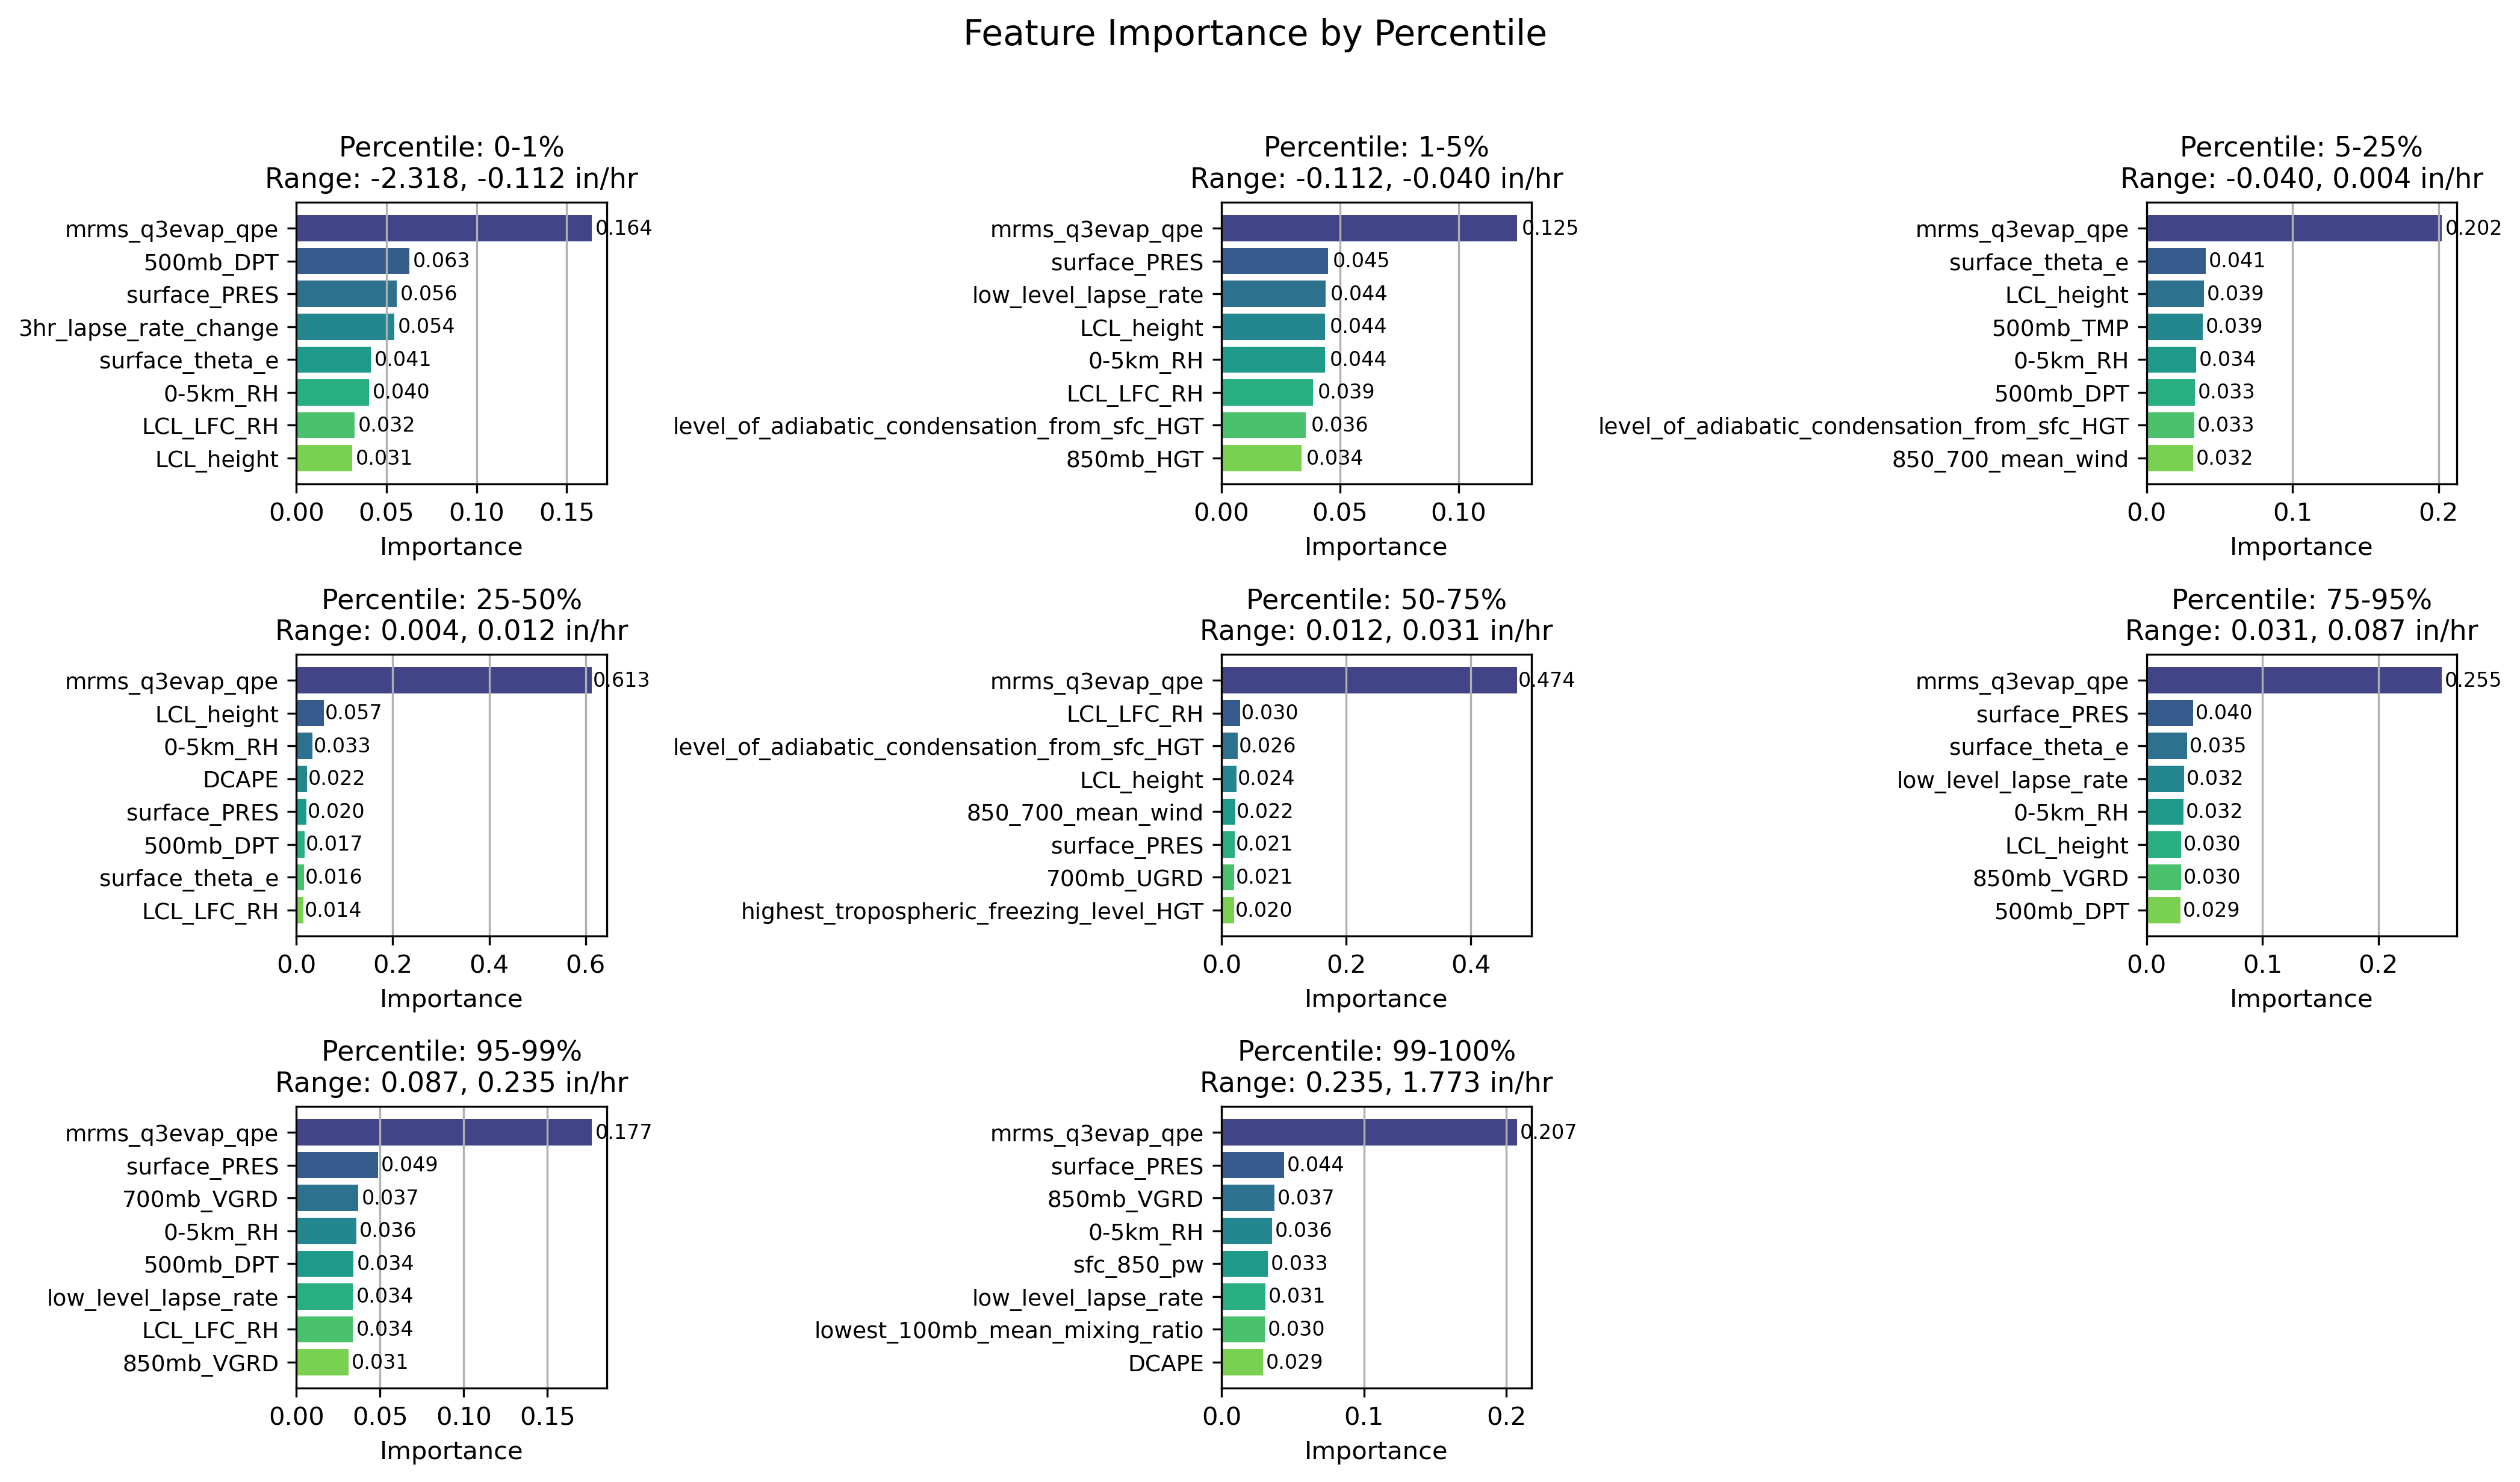

In [36]:
"""
Stratified Feature Importance Visualization for LGBMRegressor

This script visualizes which features are most important across different
percentile intervals of the target variable.

Usage:
    1. Replace the synthetic data section with your actual data loading
    2. Run the script to generate three visualization types:
       - Heatmap showing importance across all strata
       - Bar charts showing top features per stratum  
       - Line plot showing how importance changes across strata
"""

import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def get_stratified_feature_importance(X, y, percentile_bins=None, min_samples=50):
    """
    Calculate feature importance for different percentile intervals of target values.
    
    For each percentile bin, we train a separate model on samples within that
    target range to understand which features matter most in that regime.
    
    Parameters:
    -----------
    X : DataFrame - Features
    y : Series - Target variable
    percentile_bins : list of tuples, e.g., [(0, 5), (5, 25), ...]
    min_samples : int - Minimum samples required per stratum
    
    Returns:
    --------
    importance_raw : DataFrame with raw feature importance per stratum
    importance_normalized : DataFrame with normalized importance (sums to 1)
    """
    if percentile_bins is None:
        percentile_bins = [(0, 5), (5, 25), (25, 50), (50, 75), (75, 95), (95, 100)]
    
    results = {}
    sample_counts = {}
    
    for low_pct, high_pct in percentile_bins:
        low_val = np.percentile(y, low_pct)
        high_val = np.percentile(y, high_pct)
        
        # Get samples in this percentile range
        if low_pct == 0:
            mask = (y >= low_val) & (y <= high_val)
        else:
            mask = (y > low_val) & (y <= high_val)
        
        X_stratum = X[mask]
        y_stratum = y[mask]
        
        bin_label = f"{low_pct}-{high_pct}%"
        sample_counts[bin_label] = len(X_stratum)
        
        if len(X_stratum) < min_samples:
            print(f"⚠️  Skipping {bin_label} - insufficient samples ({len(X_stratum)} < {min_samples})")
            continue
        
        # Train a model on this stratum to get stratum-specific importance
        stratum_model = lgb.LGBMRegressor(
            n_estimators=100,
            learning_rate=0.1,
            num_leaves=31,
            n_jobs=-1,
            verbose=-1
        )
        stratum_model.fit(X_stratum, y_stratum)
        
        # Get feature importance (gain-based by default)
        importance = stratum_model.feature_importances_
        results[bin_label] = importance
        
        print(f"✓ Stratum {bin_label}: {len(X_stratum):,} samples, "
              f"y ∈ [{y_stratum.min():.4f}, {y_stratum.max():.4f}]")
    
    # Create DataFrames
    importance_raw = pd.DataFrame(results, index=X.columns)
    
    # Normalize each column to sum to 1 for easier comparison
    importance_normalized = importance_raw.div(importance_raw.sum(axis=0), axis=1)
    
    return importance_raw, importance_normalized, sample_counts


def plot_stratified_importance_heatmap(importance_df, top_n=15, figsize=(12, 10), 
                                       title=None, cmap='YlOrRd'):
    """
    Create a heatmap showing feature importance across target percentile strata.
    
    Parameters:
    -----------
    importance_df : DataFrame with features as index, strata as columns
    top_n : int - Number of top features to display
    figsize : tuple - Figure size
    title : str - Custom title (optional)
    cmap : str - Colormap name
    """
    # Get top N features by mean importance across all strata
    mean_importance = importance_df.mean(axis=1)
    top_features = mean_importance.nlargest(top_n).index
    
    plot_df = importance_df.loc[top_features]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    im = ax.imshow(plot_df.values, aspect='auto', cmap=cmap)
    
    # Set ticks
    ax.set_xticks(np.arange(len(plot_df.columns)))
    ax.set_yticks(np.arange(len(plot_df.index)))
    ax.set_xticklabels(plot_df.columns, fontsize=11)
    ax.set_yticklabels(plot_df.index, fontsize=10)
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.set_ylabel("Normalized Importance", rotation=-90, va="bottom", fontsize=11)
    
    # Add value annotations
    threshold = plot_df.values.max() * 0.6
    for i in range(len(plot_df.index)):
        for j in range(len(plot_df.columns)):
            val = plot_df.iloc[i, j]
            text_color = "white" if val > threshold else "black"
            ax.text(j, i, f"{val:.3f}", ha="center", va="center", 
                   color=text_color, fontsize=9)
    
    ax.set_xlabel("Target Value Percentile Interval", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    
    if title is None:
        title = f"Top {top_n} Feature Importance by Target Percentile Stratum"
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    
    plt.tight_layout()
    return fig, ax


def plot_stratified_importance_bars(importance_df, y, top_n=8, figsize=(14, 8)):
    """
    Create subplots with horizontal bar charts showing top features per stratum.
    
    Parameters:
    -----------
    importance_df : DataFrame with features as index, strata as columns
    top_n : int - Number of top features per stratum
    figsize : tuple - Figure size
    """

    n_strata = len(importance_df.columns)
    n_rows = (n_strata + 2) // 3  # Ceiling division for 3 columns
    
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize, dpi=300)
    axes = axes.flatten() if n_strata > 1 else [axes]
    
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, top_n))
    
    for idx, stratum in enumerate(importance_df.columns):

        if idx >= len(axes):
            break
            
        ax = axes[idx]
        top_features = importance_df[stratum].nlargest(top_n)
        
        bars = ax.barh(range(top_n), top_features.values, color=colors)
        ax.set_yticks(range(top_n))
        ax.set_yticklabels(top_features.index, fontsize=9)
        ax.invert_yaxis()
        ax.set_xlabel("Importance", fontsize=10)
        
        # TODO: add in/hr ranges
        low_pct, high_pct = stratum.replace("%","").split("-")
        low_pct, high_pct = float(low_pct), float(high_pct)

        low_val  = np.percentile(y, low_pct)
        high_val = np.percentile(y, high_pct)

        ax.set_title(f"Percentile: {stratum}\nRange: {low_val:.3f}, {high_val:.3f} in/hr", fontsize=11)
        ax.grid(axis='x')
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, top_features.values)):
            ax.text(val + 0.002, i, f'{val:.3f}', va='center', fontsize=8)
    
    # Hide unused subplots
    for idx in range(n_strata, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle("Feature Importance by Percentile", 
                fontsize=14, y=1.02)
    plt.tight_layout()
    return fig, axes


def plot_feature_importance_lines(importance_df, top_n=8, figsize=(12, 6)):
    """
    Line plot showing how feature importance changes across strata.
    
    This visualization highlights features whose importance varies significantly
    across different target value ranges.
    
    Parameters:
    -----------
    importance_df : DataFrame with features as index, strata as columns
    top_n : int - Number of top features to display
    figsize : tuple - Figure size
    """
    mean_importance = importance_df.mean(axis=1)
    top_features = mean_importance.nlargest(top_n).index
    
    plot_df = importance_df.loc[top_features]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.tab10(np.linspace(0, 1, min(top_n, 10)))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'h', '*']
    
    for i, feature in enumerate(plot_df.index):
        ax.plot(plot_df.columns, plot_df.loc[feature], 
                marker=markers[i % len(markers)], 
                markersize=8, linewidth=2, 
                label=feature, color=colors[i % len(colors)])
    
    ax.set_xlabel("Target Value Percentile Interval", fontsize=12)
    ax.set_ylabel("Normalized Importance", fontsize=12)
    ax.set_title("Feature Importance Across Target Value Strata", 
                fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    return fig, ax


def plot_importance_variance(importance_df, top_n=15, figsize=(10, 6)):
    """
    Bar chart showing which features have the most variable importance across strata.
    
    High variance indicates features that are important in some target ranges
    but not others - potentially interesting for understanding non-linear relationships.
    """
    variance = importance_df.var(axis=1).sort_values(ascending=False).head(top_n)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.RdYlGn_r(variance.values / variance.max())
    bars = ax.barh(range(len(variance)), variance.values, color=colors)
    
    ax.set_yticks(range(len(variance)))
    ax.set_yticklabels(variance.index, fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel("Importance Variance Across Strata", fontsize=12)
    ax.set_title("Features with Most Variable Importance Across Target Strata\n"
                "(Higher = more regime-dependent)", fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    return fig, ax


X = df_subset.drop(columns=["bias", "gauge_acc_in"])
y = df_subset["bias"]

# Split data (if you want to analyze test set predictions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

percentile_bins = [
    (0, 1),     # Extreme low
    (1, 5),     # Extreme low
    (5, 25),    # Low
    (25, 50),   # Below median
    (50, 75),   # Above median
    (75, 95),   # High
    (95, 99),   # Extreme high
    (99, 100)   # Extreme high
]

# =========================================================================
# Calculate stratified importance
# =========================================================================
print("📈 Calculating feature importance per stratum...\n")

importance_raw, importance_norm, sample_counts = get_stratified_feature_importance(
    X, y, percentile_bins=percentile_bins, min_samples=50
)

# =========================================================================
# Generate visualizations
# =========================================================================
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70 + "\n")

# 1. Heatmap
# fig1, ax1 = plot_stratified_importance_heatmap(importance_norm, top_n=12)
# fig1.savefig('feature_importance_heatmap.png', dpi=150, bbox_inches='tight')
# print("✓ Saved: feature_importance_heatmap.png")

# 2. Bar charts per stratum
fig2, axes2 = plot_stratified_importance_bars(importance_norm, y, top_n=8)
# fig2.savefig('feature_importance_bars.png', dpi=150, bbox_inches='tight')
# print("✓ Saved: feature_importance_bars.png")

# 3. Line plot showing importance evolution
# fig3, ax3 = plot_feature_importance_lines(importance_norm, top_n=8)
# fig3.savefig('feature_importance_lines.png', dpi=150, bbox_inches='tight')
# print("✓ Saved: feature_importance_lines.png")

# 4. Variance plot (bonus - shows regime-dependent features)
# fig4, ax4 = plot_importance_variance(importance_norm, top_n=12)
# fig4.savefig('feature_importance_variance.png', dpi=150, bbox_inches='tight')
# print("✓ Saved: feature_importance_variance.png")

# =========================================================================
# Print summary statistics
# =========================================================================
# print("\n" + "="*70)
# print("SUMMARY: Top Features by Importance Variance")
# print("="*70)
# print("(Features that matter differently across target ranges)\n")

variance_ranking = importance_norm.var(axis=1).sort_values(ascending=False)
for i, (feat, var) in enumerate(variance_ranking.head(10).items()):
    print(f"  {i+1:2d}. {feat:20s} variance: {var:.4f}")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

plt.show()

### todo

- [ ] plot the conditional distribution of biases within each bias-regime; i.e., quanitfy the inherent uncertainty of each percentile bucket; make a nice grid plot

📈 Calculating feature importance and performance metrics per stratum...

✓ Stratum 0-1%: 10,694 samples, y ∈ [-2.3182, -0.1121]
   └─ R² (train/test): 0.9313 / 0.9368
   └─ RMSE (train/test): 0.0482 / 0.0536
✓ Stratum 1-5%: 42,585 samples, y ∈ [-0.1121, -0.0400]
   └─ R² (train/test): 0.6352 / 0.5920
   └─ RMSE (train/test): 0.0122 / 0.0129
✓ Stratum 5-25%: 243,608 samples, y ∈ [-0.0400, 0.0039]
   └─ R² (train/test): 0.7935 / 0.7816
   └─ RMSE (train/test): 0.0062 / 0.0064
✓ Stratum 25-50%: 255,946 samples, y ∈ [0.0041, 0.0118]
   └─ R² (train/test): 0.9997 / 0.9996
   └─ RMSE (train/test): 0.0000 / 0.0000
✓ Stratum 50-75%: 246,377 samples, y ∈ [0.0120, 0.0309]
   └─ R² (train/test): 0.9846 / 0.9814
   └─ RMSE (train/test): 0.0006 / 0.0006
✓ Stratum 75-95%: 212,787 samples, y ∈ [0.0309, 0.0866]
   └─ R² (train/test): 0.7683 / 0.7507
   └─ RMSE (train/test): 0.0073 / 0.0075
✓ Stratum 95-99%: 41,311 samples, y ∈ [0.0868, 0.2351]
   └─ R² (train/test): 0.8337 / 0.7925
   └─ RMSE (train/t

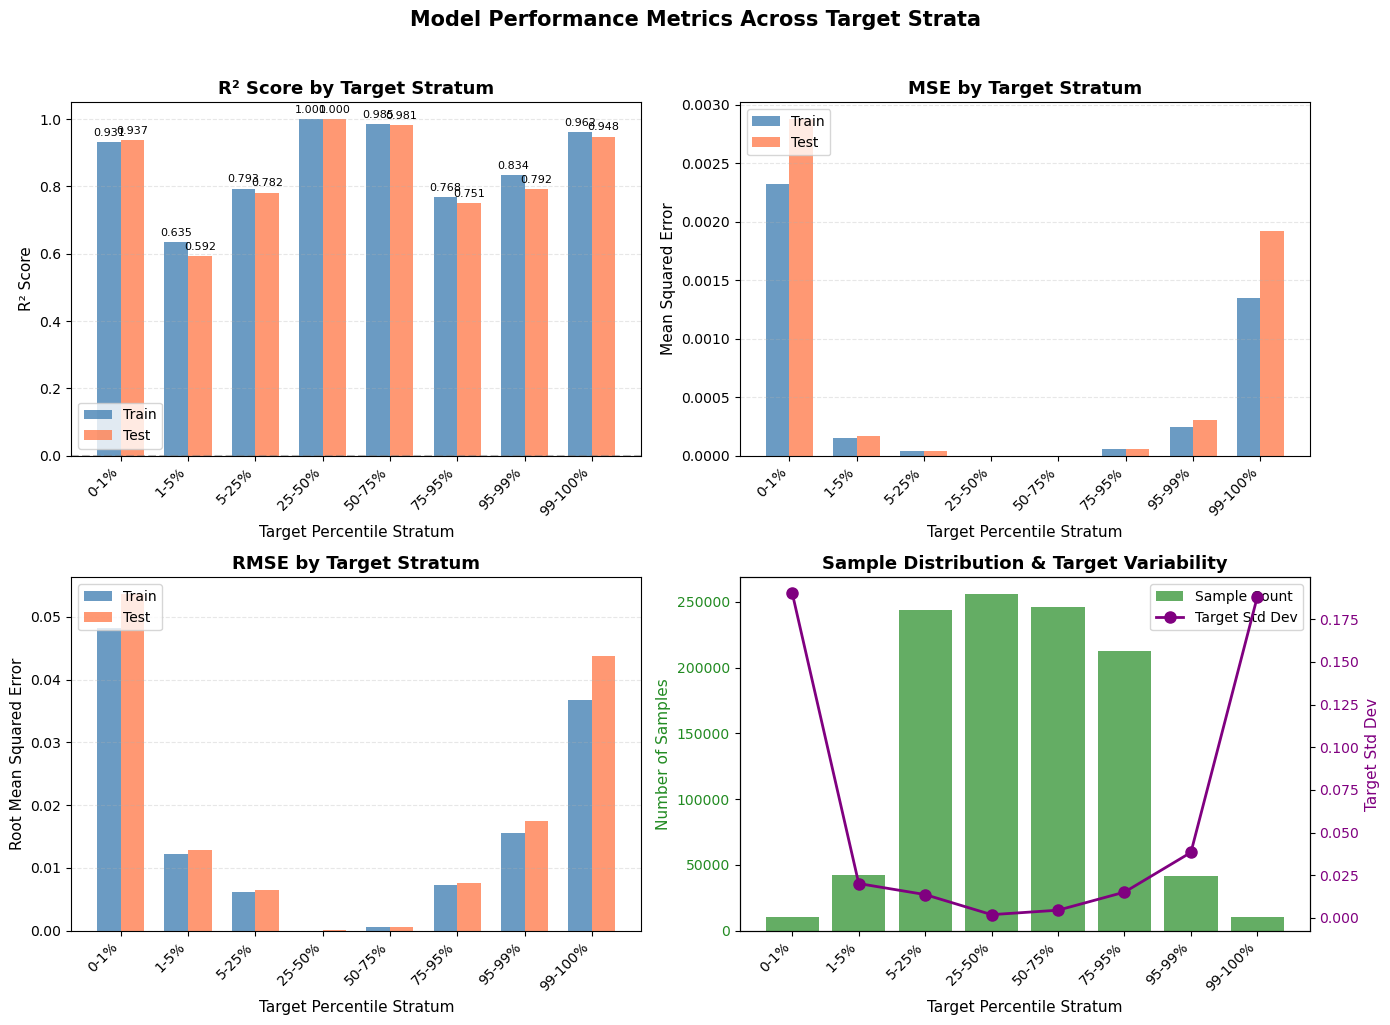

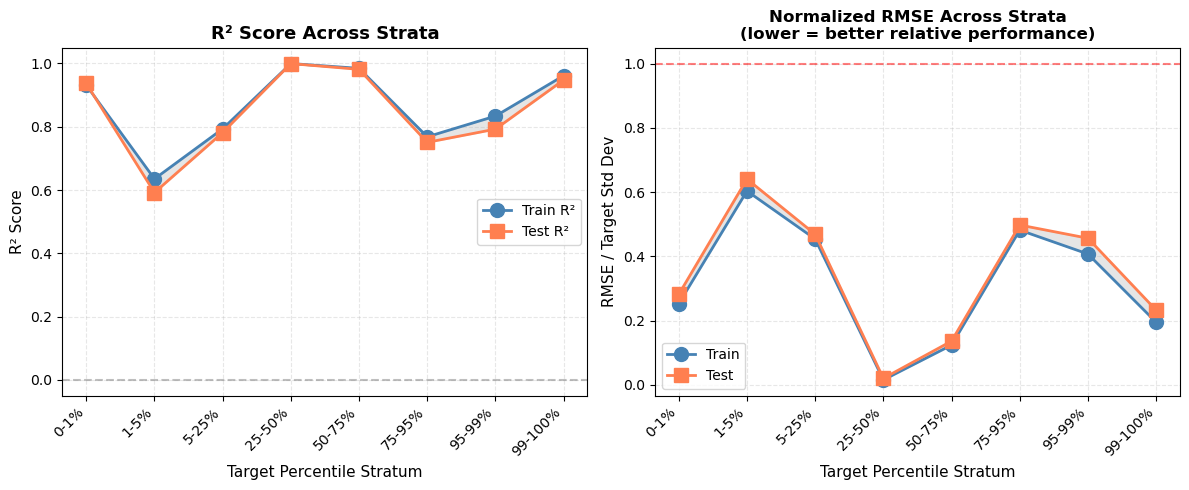

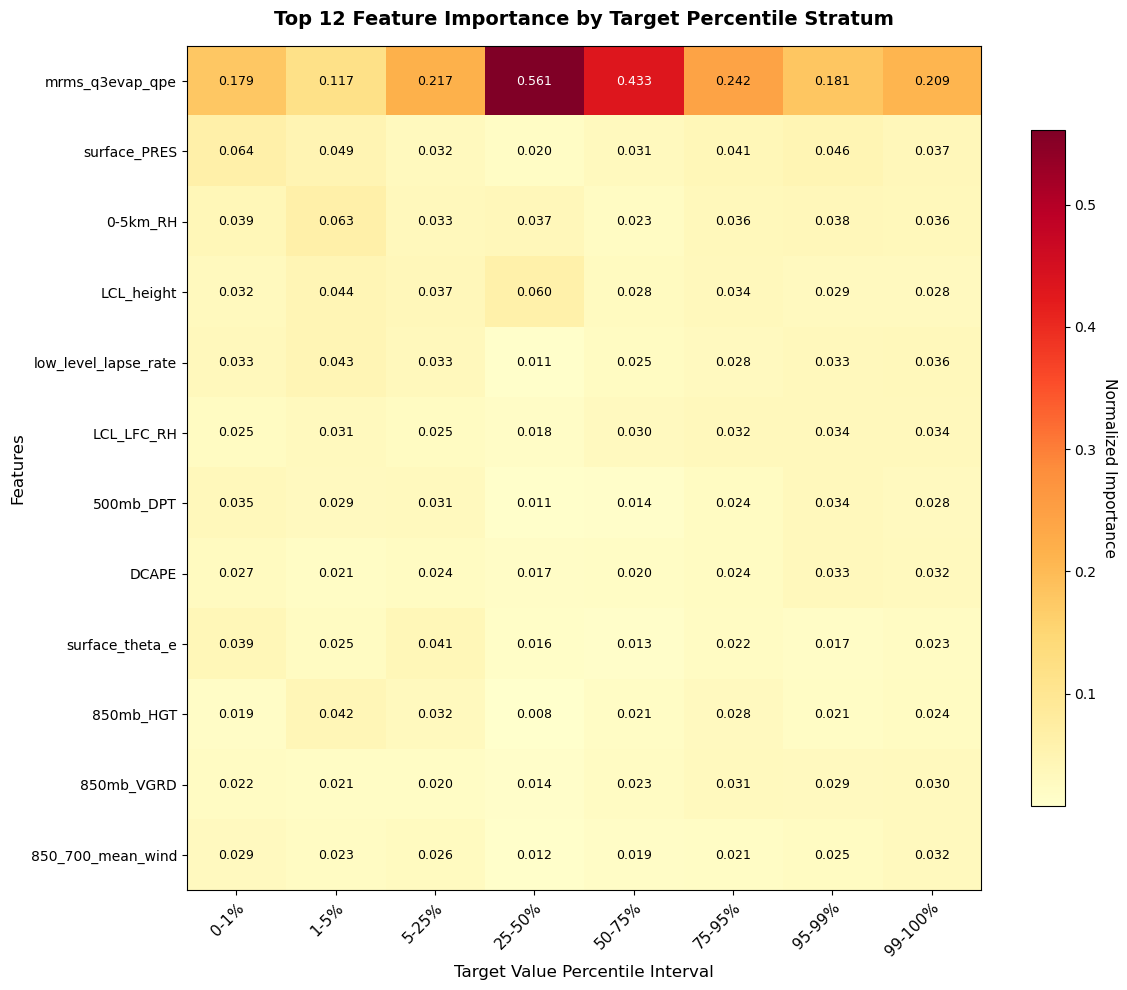

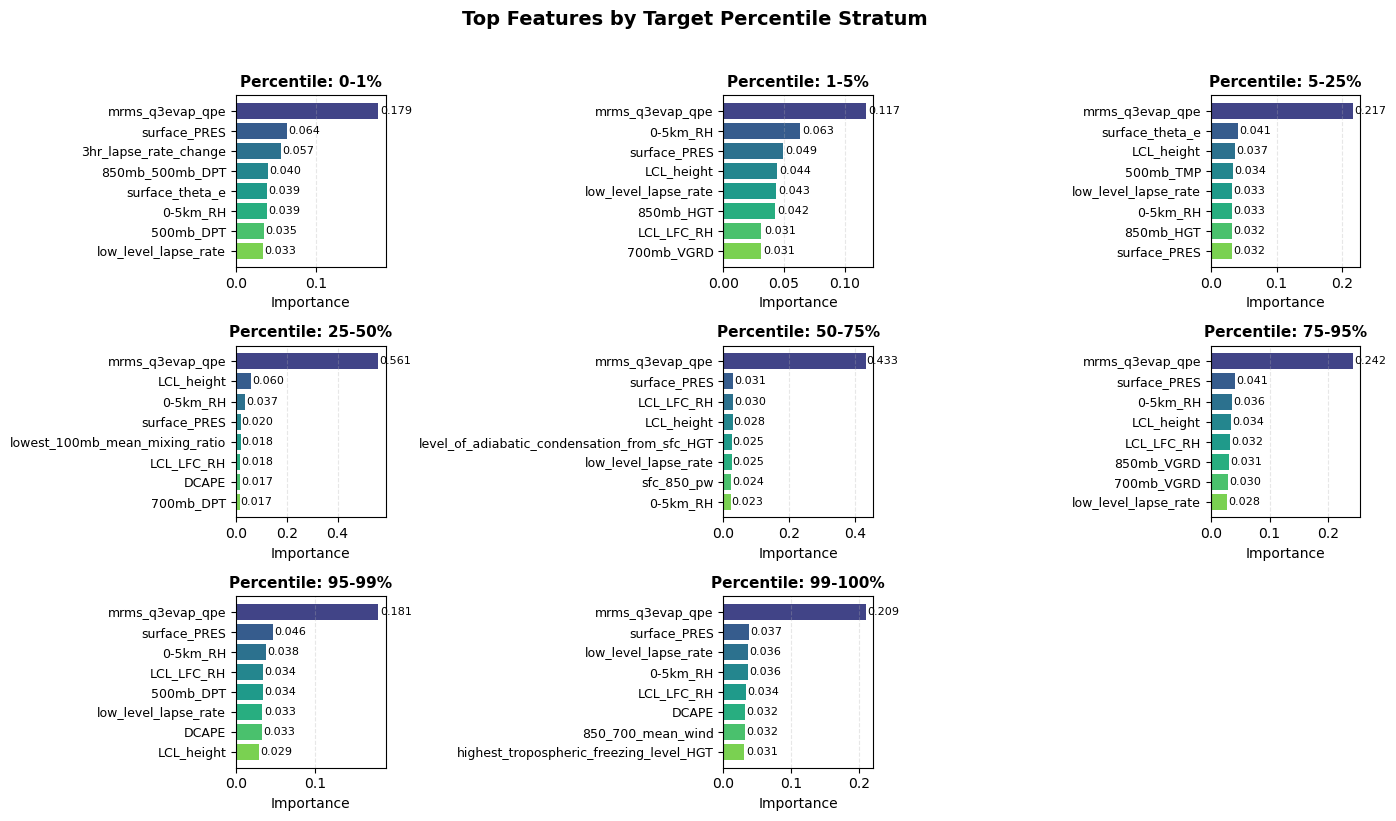

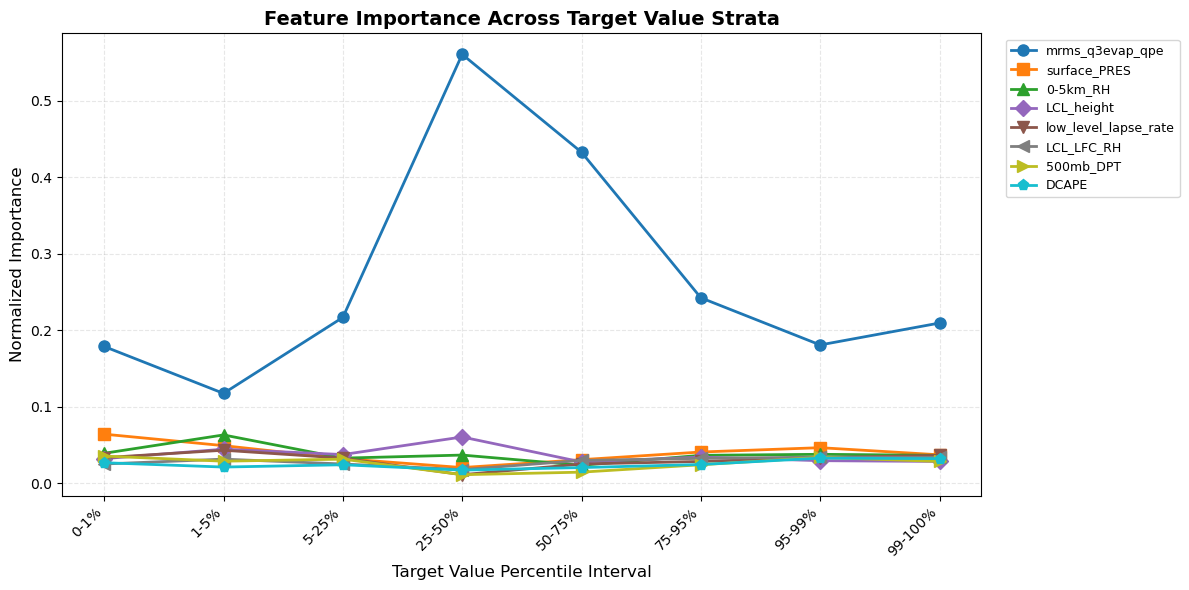

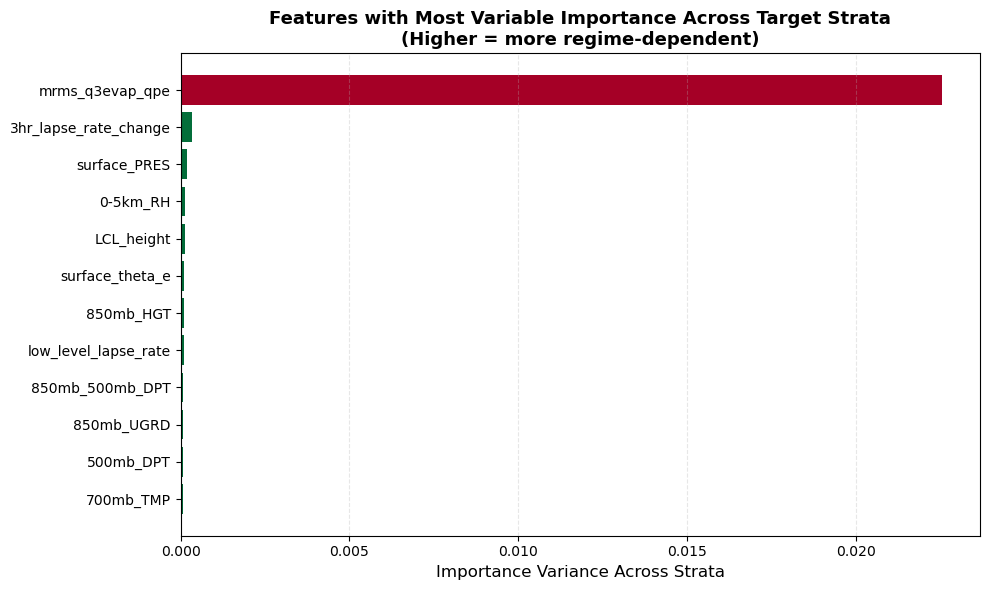

In [44]:
"""
Stratified Feature Importance Visualization for LGBMRegressor
with R² and MSE Performance Metrics per Stratum

This script visualizes which features are most important across different
percentile intervals of the target variable, along with model performance
metrics (R² and MSE) for each stratum.

Usage:
    1. Replace the synthetic data section with your actual data loading
    2. Run the script to generate visualizations including:
       - Heatmap showing importance across all strata
       - Bar charts showing top features per stratum  
       - Line plot showing how importance changes across strata
       - Performance metrics (R², MSE) per stratum
"""

import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


def get_stratified_feature_importance(X, y, percentile_bins=None, min_samples=50, 
                                       test_size=0.2, random_state=42):
    """
    Calculate feature importance and performance metrics for different 
    percentile intervals of target values.
    
    For each percentile bin, we train a separate model on samples within that
    target range to understand which features matter most in that regime,
    and evaluate performance on a held-out portion.
    
    Parameters:
    -----------
    X : DataFrame - Features
    y : Series - Target variable
    percentile_bins : list of tuples, e.g., [(0, 5), (5, 25), ...]
    min_samples : int - Minimum samples required per stratum
    test_size : float - Fraction of stratum data to use for testing
    random_state : int - Random seed for reproducibility
    
    Returns:
    --------
    importance_raw : DataFrame with raw feature importance per stratum
    importance_normalized : DataFrame with normalized importance (sums to 1)
    metrics : DataFrame with R², MSE, RMSE, sample counts per stratum
    """
    if percentile_bins is None:
        percentile_bins = [(0, 5), (5, 25), (25, 50), (50, 75), (75, 95), (95, 100)]
    
    importance_results = {}
    metrics_results = {}
    
    for low_pct, high_pct in percentile_bins:
        low_val = np.percentile(y, low_pct)
        high_val = np.percentile(y, high_pct)
        
        # Get samples in this percentile range
        if low_pct == 0:
            mask = (y >= low_val) & (y <= high_val)
        else:
            mask = (y > low_val) & (y <= high_val)
        
        X_stratum = X[mask]
        y_stratum = y[mask]
        
        bin_label = f"{low_pct}-{high_pct}%"
        
        if len(X_stratum) < min_samples:
            print(f"⚠️  Skipping {bin_label} - insufficient samples ({len(X_stratum)} < {min_samples})")
            continue
        
        # Split stratum data into train/test
        X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(
            X_stratum, y_stratum, test_size=test_size, random_state=random_state
        )
        
        # Train a model on this stratum
        stratum_model = lgb.LGBMRegressor(
            n_estimators=100,
            learning_rate=0.1,
            num_leaves=31,
            n_jobs=-1,
            verbose=-1
        )
        stratum_model.fit(X_str_train, y_str_train)
        
        # Get predictions and calculate metrics
        y_pred_train = stratum_model.predict(X_str_train)
        y_pred_test = stratum_model.predict(X_str_test)
        
        # Calculate performance metrics
        r2_train = r2_score(y_str_train, y_pred_train)
        r2_test = r2_score(y_str_test, y_pred_test)
        mse_train = mean_squared_error(y_str_train, y_pred_train)
        mse_test = mean_squared_error(y_str_test, y_pred_test)
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        
        # Store metrics
        metrics_results[bin_label] = {
            'n_samples': len(X_stratum),
            'n_train': len(X_str_train),
            'n_test': len(X_str_test),
            'y_min': y_stratum.min(),
            'y_max': y_stratum.max(),
            'y_mean': y_stratum.mean(),
            'y_std': y_stratum.std(),
            'r2_train': r2_train,
            'r2_test': r2_test,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'rmse_train': rmse_train,
            'rmse_test': rmse_test
        }
        
        # Get feature importance (gain-based by default)
        importance = stratum_model.feature_importances_
        importance_results[bin_label] = importance
        
        print(f"✓ Stratum {bin_label}: {len(X_stratum):,} samples, "
              f"y ∈ [{y_stratum.min():.4f}, {y_stratum.max():.4f}]")
        print(f"   └─ R² (train/test): {r2_train:.4f} / {r2_test:.4f}")
        print(f"   └─ RMSE (train/test): {rmse_train:.4f} / {rmse_test:.4f}")
    
    # Create DataFrames
    importance_raw = pd.DataFrame(importance_results, index=X.columns)
    importance_normalized = importance_raw.div(importance_raw.sum(axis=0), axis=1)
    metrics_df = pd.DataFrame(metrics_results).T
    
    return importance_raw, importance_normalized, metrics_df


def plot_stratum_metrics(metrics_df, figsize=(14, 10)):
    """
    Create visualizations of R² and MSE across strata.
    
    Parameters:
    -----------
    metrics_df : DataFrame with metrics per stratum
    figsize : tuple - Figure size
    
    Returns:
    --------
    fig, axes : matplotlib figure and axes
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    strata = metrics_df.index.tolist()
    x_pos = np.arange(len(strata))
    bar_width = 0.35
    
    # Plot 1: R² scores (train vs test)
    ax1 = axes[0, 0]
    bars1 = ax1.bar(x_pos - bar_width/2, metrics_df['r2_train'], bar_width, 
                    label='Train', color='steelblue', alpha=0.8)
    bars2 = ax1.bar(x_pos + bar_width/2, metrics_df['r2_test'], bar_width, 
                    label='Test', color='coral', alpha=0.8)
    
    ax1.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax1.set_ylabel('R² Score', fontsize=11)
    ax1.set_title('R² Score by Target Stratum', fontsize=13, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(strata, rotation=45, ha='right')
    ax1.legend(loc='lower left')
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    for bar in bars2:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    
    # Plot 2: MSE scores (train vs test)
    ax2 = axes[0, 1]
    bars3 = ax2.bar(x_pos - bar_width/2, metrics_df['mse_train'], bar_width, 
                    label='Train', color='steelblue', alpha=0.8)
    bars4 = ax2.bar(x_pos + bar_width/2, metrics_df['mse_test'], bar_width, 
                    label='Test', color='coral', alpha=0.8)
    
    ax2.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax2.set_ylabel('Mean Squared Error', fontsize=11)
    ax2.set_title('MSE by Target Stratum', fontsize=13, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(strata, rotation=45, ha='right')
    ax2.legend(loc='upper left')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Plot 3: RMSE scores (easier to interpret)
    ax3 = axes[1, 0]
    bars5 = ax3.bar(x_pos - bar_width/2, metrics_df['rmse_train'], bar_width, 
                    label='Train', color='steelblue', alpha=0.8)
    bars6 = ax3.bar(x_pos + bar_width/2, metrics_df['rmse_test'], bar_width, 
                    label='Test', color='coral', alpha=0.8)
    
    ax3.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax3.set_ylabel('Root Mean Squared Error', fontsize=11)
    ax3.set_title('RMSE by Target Stratum', fontsize=13, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(strata, rotation=45, ha='right')
    ax3.legend(loc='upper left')
    ax3.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Plot 4: Sample counts and target statistics
    ax4 = axes[1, 1]
    ax4_twin = ax4.twinx()
    
    bars7 = ax4.bar(x_pos, metrics_df['n_samples'], color='forestgreen', alpha=0.7, label='Sample Count')
    line1 = ax4_twin.plot(x_pos, metrics_df['y_std'], 'o-', color='purple', 
                          linewidth=2, markersize=8, label='Target Std Dev')
    
    ax4.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax4.set_ylabel('Number of Samples', fontsize=11, color='forestgreen')
    ax4_twin.set_ylabel('Target Std Dev', fontsize=11, color='purple')
    ax4.set_title('Sample Distribution & Target Variability', fontsize=13, fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(strata, rotation=45, ha='right')
    ax4.tick_params(axis='y', labelcolor='forestgreen')
    ax4_twin.tick_params(axis='y', labelcolor='purple')
    
    # Combined legend
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.suptitle('Model Performance Metrics Across Target Strata', 
                 fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    return fig, axes


def plot_metrics_summary(metrics_df, figsize=(12, 5)):
    """
    Create a combined line plot showing R² and normalized RMSE across strata.
    
    Parameters:
    -----------
    metrics_df : DataFrame with metrics per stratum
    figsize : tuple - Figure size
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    strata = metrics_df.index.tolist()
    x_pos = np.arange(len(strata))
    
    # Plot 1: R² line plot
    ax1.plot(x_pos, metrics_df['r2_train'], 'o-', color='steelblue', 
             linewidth=2, markersize=10, label='Train R²')
    ax1.plot(x_pos, metrics_df['r2_test'], 's-', color='coral', 
             linewidth=2, markersize=10, label='Test R²')
    ax1.fill_between(x_pos, metrics_df['r2_train'], metrics_df['r2_test'], 
                     alpha=0.2, color='gray')
    
    ax1.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax1.set_ylabel('R² Score', fontsize=11)
    ax1.set_title('R² Score Across Strata', fontsize=13, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(strata, rotation=45, ha='right')
    ax1.legend(loc='best')
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # Plot 2: Normalized RMSE (RMSE / target std)
    # This shows how well the model predicts relative to the inherent variability
    normalized_rmse_train = metrics_df['rmse_train'] / metrics_df['y_std']
    normalized_rmse_test = metrics_df['rmse_test'] / metrics_df['y_std']
    
    ax2.plot(x_pos, normalized_rmse_train, 'o-', color='steelblue', 
             linewidth=2, markersize=10, label='Train')
    ax2.plot(x_pos, normalized_rmse_test, 's-', color='coral', 
             linewidth=2, markersize=10, label='Test')
    ax2.fill_between(x_pos, normalized_rmse_train, normalized_rmse_test, 
                     alpha=0.2, color='gray')
    
    ax2.set_xlabel('Target Percentile Stratum', fontsize=11)
    ax2.set_ylabel('RMSE / Target Std Dev', fontsize=11)
    ax2.set_title('Normalized RMSE Across Strata\n(lower = better relative performance)', 
                  fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(strata, rotation=45, ha='right')
    ax2.legend(loc='best')
    ax2.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Baseline (std dev)')
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    return fig, (ax1, ax2)


def plot_stratified_importance_heatmap(importance_df, top_n=15, figsize=(12, 10), 
                                       title=None, cmap='YlOrRd'):
    """
    Create a heatmap showing feature importance across target percentile strata.
    """
    mean_importance = importance_df.mean(axis=1)
    top_features = mean_importance.nlargest(top_n).index
    
    plot_df = importance_df.loc[top_features]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    im = ax.imshow(plot_df.values, aspect='auto', cmap=cmap)
    
    ax.set_xticks(np.arange(len(plot_df.columns)))
    ax.set_yticks(np.arange(len(plot_df.index)))
    ax.set_xticklabels(plot_df.columns, fontsize=11)
    ax.set_yticklabels(plot_df.index, fontsize=10)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.set_ylabel("Normalized Importance", rotation=-90, va="bottom", fontsize=11)
    
    threshold = plot_df.values.max() * 0.6
    for i in range(len(plot_df.index)):
        for j in range(len(plot_df.columns)):
            val = plot_df.iloc[i, j]
            text_color = "white" if val > threshold else "black"
            ax.text(j, i, f"{val:.3f}", ha="center", va="center", 
                   color=text_color, fontsize=9)
    
    ax.set_xlabel("Target Value Percentile Interval", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    
    if title is None:
        title = f"Top {top_n} Feature Importance by Target Percentile Stratum"
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    
    plt.tight_layout()
    return fig, ax


def plot_stratified_importance_bars(importance_df, top_n=8, figsize=(14, 8)):
    """
    Create subplots with horizontal bar charts showing top features per stratum.
    """
    n_strata = len(importance_df.columns)
    n_rows = (n_strata + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    axes = axes.flatten() if n_strata > 1 else [axes]
    
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, top_n))
    
    for idx, stratum in enumerate(importance_df.columns):
        if idx >= len(axes):
            break
            
        ax = axes[idx]
        top_features = importance_df[stratum].nlargest(top_n)
        
        bars = ax.barh(range(top_n), top_features.values, color=colors)
        ax.set_yticks(range(top_n))
        ax.set_yticklabels(top_features.index, fontsize=9)
        ax.invert_yaxis()
        ax.set_xlabel("Importance", fontsize=10)
        ax.set_title(f"Percentile: {stratum}", fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        
        for i, (bar, val) in enumerate(zip(bars, top_features.values)):
            ax.text(val + 0.002, i, f'{val:.3f}', va='center', fontsize=8)
    
    for idx in range(n_strata, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle("Top Features by Target Percentile Stratum", 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    return fig, axes


def plot_feature_importance_lines(importance_df, top_n=8, figsize=(12, 6)):
    """
    Line plot showing how feature importance changes across strata.
    """
    mean_importance = importance_df.mean(axis=1)
    top_features = mean_importance.nlargest(top_n).index
    
    plot_df = importance_df.loc[top_features]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.tab10(np.linspace(0, 1, min(top_n, 10)))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'h', '*']
    
    for i, feature in enumerate(plot_df.index):
        ax.plot(plot_df.columns, plot_df.loc[feature], 
                marker=markers[i % len(markers)], 
                markersize=8, linewidth=2, 
                label=feature, color=colors[i % len(colors)])
    
    ax.set_xlabel("Target Value Percentile Interval", fontsize=12)
    ax.set_ylabel("Normalized Importance", fontsize=12)
    ax.set_title("Feature Importance Across Target Value Strata", 
                fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return fig, ax


def plot_importance_variance(importance_df, top_n=15, figsize=(10, 6)):
    """
    Bar chart showing which features have the most variable importance across strata.
    """
    variance = importance_df.var(axis=1).sort_values(ascending=False).head(top_n)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.RdYlGn_r(variance.values / variance.max())
    bars = ax.barh(range(len(variance)), variance.values, color=colors)
    
    ax.set_yticks(range(len(variance)))
    ax.set_yticklabels(variance.index, fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel("Importance Variance Across Strata", fontsize=12)
    ax.set_title("Features with Most Variable Importance Across Target Strata\n"
                "(Higher = more regime-dependent)", fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    return fig, ax


def print_metrics_table(metrics_df):
    """
    Print a formatted table of all metrics.
    """
    print("\n" + "="*90)
    print("PERFORMANCE METRICS BY STRATUM")
    print("="*90)
    
    # Format the metrics for display
    display_df = metrics_df.copy()
    display_df['r2_train'] = display_df['r2_train'].map('{:.4f}'.format)
    display_df['r2_test'] = display_df['r2_test'].map('{:.4f}'.format)
    display_df['mse_train'] = display_df['mse_train'].map('{:.6f}'.format)
    display_df['mse_test'] = display_df['mse_test'].map('{:.6f}'.format)
    display_df['rmse_train'] = display_df['rmse_train'].map('{:.4f}'.format)
    display_df['rmse_test'] = display_df['rmse_test'].map('{:.4f}'.format)
    display_df['y_mean'] = display_df['y_mean'].map('{:.4f}'.format)
    display_df['y_std'] = display_df['y_std'].map('{:.4f}'.format)
    
    print(display_df[['n_samples', 'r2_train', 'r2_test', 'rmse_train', 'rmse_test', 'y_mean', 'y_std']].to_string())
    print("="*90)


# =============================================================================
# MAIN EXECUTION - Replace this section with your actual data
# =============================================================================

if __name__ == "__main__":
    
    # =========================================================================
    # OPTION 1: Use your actual data (uncomment and modify)
    # =========================================================================
    """
    # Load your data
    df_subset = pd.read_csv("your_data.csv")  # or however you load it
    """
    
    X = df_subset.drop(columns=["bias", "gauge_acc_in"])
    y = df_subset["bias"]
    
    # =========================================================================
    # Define percentile bins
    # =========================================================================
    percentile_bins = [
        (0, 1),     # Extreme low
        (1, 5),     # Very low
        (5, 25),    # Low
        (25, 50),   # Below median
        (50, 75),   # Above median
        (75, 95),   # High
        (95, 99),   # Very high
        (99, 100)   # Extreme high
    ]
    
    # =========================================================================
    # Calculate stratified importance and metrics
    # =========================================================================
    print("📈 Calculating feature importance and performance metrics per stratum...\n")
    
    importance_raw, importance_norm, metrics_df = get_stratified_feature_importance(
        X, y, percentile_bins=percentile_bins, min_samples=30, test_size=0.2
    )
    
    # =========================================================================
    # Print metrics table
    # =========================================================================
    print_metrics_table(metrics_df)
    
    # =========================================================================
    # Generate visualizations
    # =========================================================================
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS")
    print("="*70 + "\n")
    
    # 1. Performance metrics plots
    fig0, axes0 = plot_stratum_metrics(metrics_df)
    fig0.savefig('stratum_performance_metrics.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: stratum_performance_metrics.png")
    
    # 2. Performance summary (R² and normalized RMSE)
    fig0b, axes0b = plot_metrics_summary(metrics_df)
    fig0b.savefig('stratum_metrics_summary.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: stratum_metrics_summary.png")
    
    # 3. Heatmap
    fig1, ax1 = plot_stratified_importance_heatmap(importance_norm, top_n=12)
    fig1.savefig('feature_importance_heatmap.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: feature_importance_heatmap.png")
    
    # 4. Bar charts per stratum
    fig2, axes2 = plot_stratified_importance_bars(importance_norm, top_n=8)
    fig2.savefig('feature_importance_bars.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: feature_importance_bars.png")
    
    # 5. Line plot showing importance evolution
    fig3, ax3 = plot_feature_importance_lines(importance_norm, top_n=8)
    fig3.savefig('feature_importance_lines.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: feature_importance_lines.png")
    
    # 6. Variance plot
    fig4, ax4 = plot_importance_variance(importance_norm, top_n=12)
    fig4.savefig('feature_importance_variance.png', dpi=150, bbox_inches='tight')
    print("✓ Saved: feature_importance_variance.png")
    
    # =========================================================================
    # Print summary statistics
    # =========================================================================
    print("\n" + "="*70)
    print("SUMMARY: Top Features by Importance Variance")
    print("="*70)
    print("(Features that matter differently across target ranges)\n")
    
    variance_ranking = importance_norm.var(axis=1).sort_values(ascending=False)
    for i, (feat, var) in enumerate(variance_ranking.head(10).items()):
        print(f"  {i+1:2d}. {feat:20s} variance: {var:.4f}")
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETE")
    print("="*70)
    
    plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


preds = model.predict(X_test)
print(f"R² score: {r2_score(y_test, preds):.5f}")
print(f"RMSE: {mean_absolute_error(y_test, preds):.5f}")

R² score: 0.22924
RMSE: 0.02494


Generating performance visualization...

Performance Metrics by Percentile Bin
Percentile      Count       RMSE        MAE         R²
----------------------------------------------------------------------
0-10%           21180      0.140      0.090     -1.987
10-20%          20313      0.042      0.033    -21.579
20-30%          20143      0.012      0.008   -153.070
30-40%              0        nan        nan        N/A
40-50%          44740      0.008      0.004    -16.211
50-60%          15931      0.012      0.009   -125.788
60-70%          22674      0.010      0.005    -16.648
70-80%          22539      0.017      0.012    -23.016
80-90%          22944      0.024      0.020    -12.054
90-100%         22326      0.084      0.063      0.302
----------------------------------------------------------------------
Overall        212790      0.055      0.025      0.229

Visualization saved!


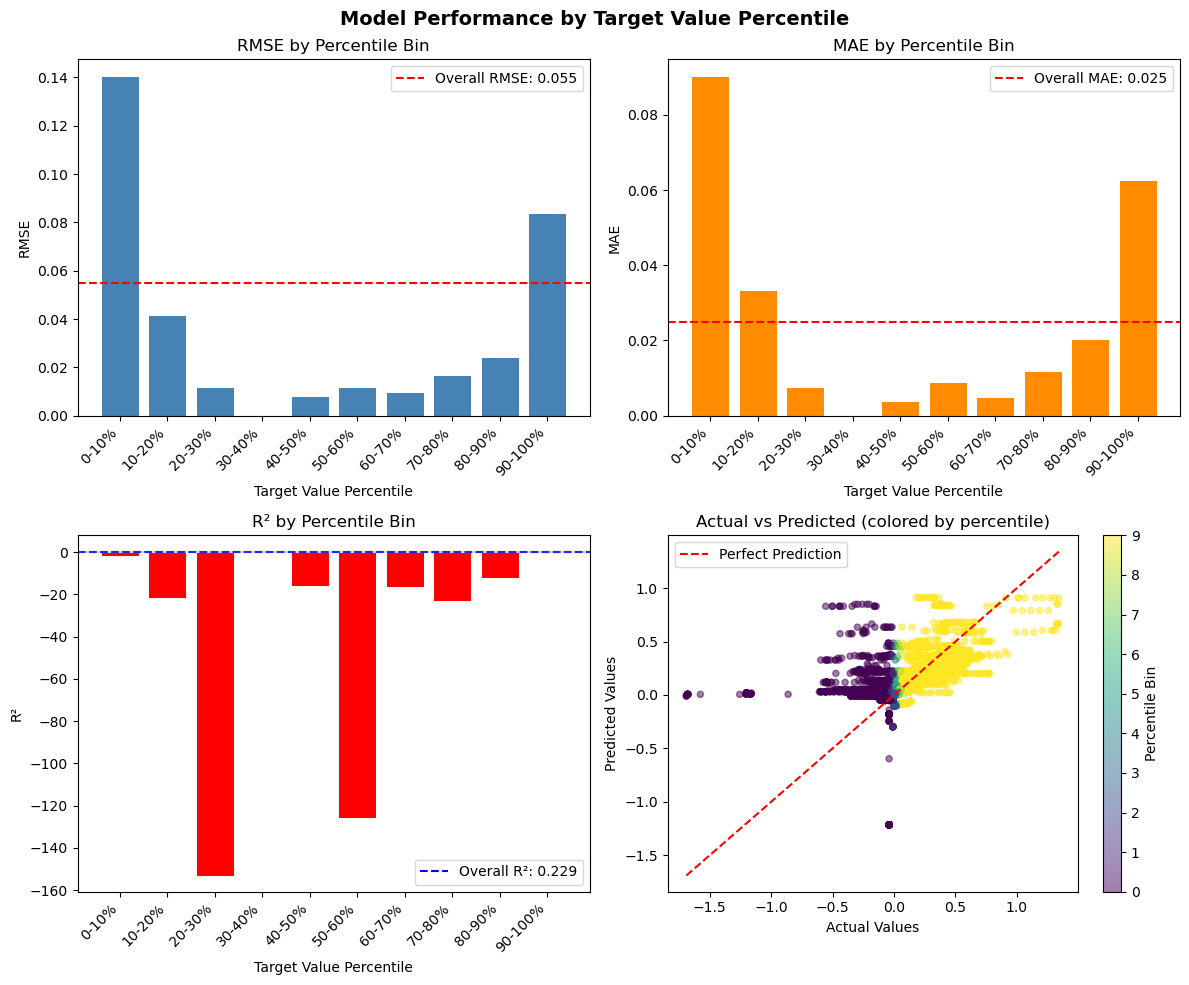

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def plot_performance_by_percentile(y_test, preds, n_bins=10):
    """
    Visualize model performance across different percentile intervals of target values.
    
    Parameters:
    -----------
    y_test : array-like
        True target values
    preds : array-like
        Predicted values
    n_bins : int
        Number of percentile bins (default 10 for deciles)
    """
    y_test = np.array(y_test)
    preds = np.array(preds)
    
    # Calculate percentile boundaries
    percentiles = np.linspace(0, 100, n_bins + 1)
    boundaries = np.percentile(y_test, percentiles)
    
    # Store metrics for each bin
    bin_labels = []
    rmse_values = []
    mae_values = []
    r2_values = []
    counts = []
    bin_centers = []
    
    for i in range(n_bins):
        # Get indices for this percentile bin
        if i == n_bins - 1:  # Last bin includes upper boundary
            mask = (y_test >= boundaries[i]) & (y_test <= boundaries[i+1])
        else:
            mask = (y_test >= boundaries[i]) & (y_test < boundaries[i+1])
        
        y_bin = y_test[mask]
        preds_bin = preds[mask]
        
        if len(y_bin) > 1:
            rmse = np.sqrt(mean_squared_error(y_bin, preds_bin))
            mae = mean_absolute_error(y_bin, preds_bin)
            # R² can be negative or undefined for small samples
            r2 = r2_score(y_bin, preds_bin) if len(y_bin) > 2 else np.nan
        else:
            rmse = mae = r2 = np.nan
        
        bin_labels.append(f"{int(percentiles[i])}-{int(percentiles[i+1])}%")
        rmse_values.append(rmse)
        mae_values.append(mae)
        r2_values.append(r2)
        counts.append(len(y_bin))
        bin_centers.append((boundaries[i] + boundaries[i+1]) / 2)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Model Performance by Target Value Percentile', fontsize=14, fontweight='bold')
    
    x_pos = np.arange(n_bins)
    
    # Plot 1: RMSE by percentile
    ax1 = axes[0, 0]
    bars1 = ax1.bar(x_pos, rmse_values, color='steelblue', edgecolor='white', linewidth=0.7)
    ax1.set_xlabel('Target Value Percentile')
    ax1.set_ylabel('RMSE')
    ax1.set_title('RMSE by Percentile Bin')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax1.axhline(y=np.sqrt(mean_squared_error(y_test, preds)), color='red', linestyle='--', 
                label=f'Overall RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.3f}')
    ax1.legend()
    
    # Plot 2: MAE by percentile
    ax2 = axes[0, 1]
    bars2 = ax2.bar(x_pos, mae_values, color='darkorange', edgecolor='white', linewidth=0.7)
    ax2.set_xlabel('Target Value Percentile')
    ax2.set_ylabel('MAE')
    ax2.set_title('MAE by Percentile Bin')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax2.axhline(y=mean_absolute_error(y_test, preds), color='red', linestyle='--',
                label=f'Overall MAE: {mean_absolute_error(y_test, preds):.3f}')
    ax2.legend()
    
    # Plot 3: R² by percentile
    ax3 = axes[1, 0]
    colors = ['green' if v >= 0 else 'red' for v in r2_values]
    bars3 = ax3.bar(x_pos, r2_values, color=colors, edgecolor='white', linewidth=0.7)
    ax3.set_xlabel('Target Value Percentile')
    ax3.set_ylabel('R²')
    ax3.set_title('R² by Percentile Bin')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax3.axhline(y=r2_score(y_test, preds), color='blue', linestyle='--',
                label=f'Overall R²: {r2_score(y_test, preds):.3f}')
    ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    ax3.legend()
    
    # Plot 4: Actual vs Predicted scatter colored by percentile
    ax4 = axes[1, 1]
    
    # Assign each point to its percentile bin
    bin_indices = np.digitize(y_test, boundaries[1:-1])
    scatter = ax4.scatter(y_test, preds, c=bin_indices, cmap='viridis', alpha=0.5, s=20)
    
    # Perfect prediction line
    min_val = min(y_test.min(), preds.min())
    max_val = max(y_test.max(), preds.max())
    ax4.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    ax4.set_xlabel('Actual Values')
    ax4.set_ylabel('Predicted Values')
    ax4.set_title('Actual vs Predicted (colored by percentile)')
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Percentile Bin')
    ax4.legend()
    
    plt.tight_layout()
    plt.savefig('percentile_performance.png', dpi=150, bbox_inches='tight')
    
    # Print summary table
    print("\n" + "="*70)
    print("Performance Metrics by Percentile Bin")
    print("="*70)
    print(f"{'Percentile':<12} {'Count':>8} {'RMSE':>10} {'MAE':>10} {'R²':>10}")
    print("-"*70)
    for i in range(n_bins):
        r2_str = f"{r2_values[i]:.3f}" if not np.isnan(r2_values[i]) else "N/A"
        print(f"{bin_labels[i]:<12} {counts[i]:>8} {rmse_values[i]:>10.3f} {mae_values[i]:>10.3f} {r2_str:>10}")
    print("-"*70)
    print(f"{'Overall':<12} {len(y_test):>8} {np.sqrt(mean_squared_error(y_test, preds)):>10.3f} "
          f"{mean_absolute_error(y_test, preds):>10.3f} {r2_score(y_test, preds):>10.3f}")
    print("="*70)
    
    return fig


print("Generating performance visualization...")
fig = plot_performance_by_percentile(y_test, preds, n_bins=10)
print("\nVisualization saved!")

# neural network

In [ ]:
# import smogn

# # After train_test_split, before scaling, add:
# from sklearn.model_selection import train_test_split

# # Combine X_train and y_train for SMOGN (it needs a single DataFrame)
# train_df = df_subset.copy()

# # Apply SMOGN to balance the training data
# train_df_balanced = smogn.smoter(
#     data=train_df,
#     y='bias',
#     k=1,                    # number of neighbors
#     samp_method='balance',  # balance the distribution
#     rel_thres=0.5,          # relevance threshold
#     rel_method='auto',      # automatic relevance function
#     rel_coef=1.5            # box plot coefficient
# )

# # from ImbalancedLearningRegression import gn, ro

# # Generally faster implementation
# train_df_balanced = gn(data=train_df, y='bias')

In [153]:
from tqdm import tqdm

# OLD imports:
# import lightgbm as lgb

# NEW imports:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

X_train = df_subset.drop(columns=["bias", "gauge_acc_in"])
y_train = df_subset["bias"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler         = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert to tensors
X_train_t = torch.FloatTensor(X_train_scaled)
y_train_t = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_t  = torch.FloatTensor(X_test_scaled)
y_test_t  = torch.FloatTensor(y_test.values).reshape(-1, 1)


class ImprovedBiasNet(nn.Module):
    """Enhanced network with modern techniques."""
    
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout=0.3, 
                 use_batch_norm=True, use_residual=False):
        super().__init__()
        
        self.use_residual = use_residual
        layers = []
        
        prev_dim = input_dim
        for i, hidden_dim in enumerate(hidden_dims):
            layers.append(nn.Linear(prev_dim, hidden_dim))
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.GELU())  # GELU often works better than ReLU
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim
        
        self.hidden = nn.Sequential(*layers)
        self.output = nn.Linear(hidden_dims[-1], 1)
        
        # Skip connection for residual
        if use_residual:
            self.skip = nn.Linear(input_dim, hidden_dims[-1])
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    def forward(self, x):
        h = self.hidden(x)
        if self.use_residual:
            h = h + self.skip(x)
        return self.output(h)

# For M3 Mac - use MPS if available
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    return torch.device("cpu")

device = get_device()
model  = ImprovedBiasNet(X_train.shape[1])

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=1028, shuffle=True)

val_dataset = TensorDataset(X_test_t, y_test_t)
val_loader  = DataLoader(val_dataset, batch_size=1028, shuffle=True)

epochs=100
lr=0.001 
weight_decay=1e-4
patience=30
verbose=True

model = model.to(device)
criterion = nn.HuberLoss(delta=1.0)  # More robust than MSE
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = CosineAnnealingWithWarmup(optimizer, warmup_epochs=10, total_epochs=epochs)
early_stopping = EarlyStopping(patience=patience)

train_losses = []
val_losses = []

# Create progress bar for epochs
# epoch_pbar = tqdm(range(epochs), desc="Training", disable=not verbose, 
#                     unit="epoch", leave=True)
for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in tqdm(train_loader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        epoch_loss += loss.item()
    
    train_loss = epoch_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in tqdm(val_loader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            pred = model(X_batch)
            val_loss += criterion(pred, y_batch).item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Validation Loss {val_loss}")
    
    # Update learning rate
    scheduler.step(epoch)

100%|██████████| 207/207 [00:03<00:00, 58.12it/s] 


Validation Loss 0.0013738957471056766


100%|██████████| 207/207 [00:00<00:00, 308.79it/s]


Validation Loss 0.0013711692161907573


100%|██████████| 207/207 [00:00<00:00, 311.31it/s]


Validation Loss 0.0013647006623838367


100%|██████████| 207/207 [00:00<00:00, 306.75it/s]


Validation Loss 0.0013674276766754182


100%|██████████| 207/207 [00:01<00:00, 192.11it/s]


Validation Loss 0.001361547587416922


100%|██████████| 207/207 [00:00<00:00, 298.60it/s]


Validation Loss 0.001378578649032951


 94%|█████████▍| 974/1035 [00:07<00:00, 128.33it/s]


KeyboardInterrupt: 

R² score: 0.291
MAE: 0.025
RMSE: 0.053
Generating Neural Network performance visualization...

Neural Network Performance Metrics by Percentile Bin
Percentile      Count       RMSE        MAE         R²
----------------------------------------------------------------------
0-10%           20933      0.133      0.092     -1.644
10-20%          20560      0.040      0.035    -19.798
20-30%          20143      0.010      0.006   -115.657
30-40%              0        nan        nan        N/A
40-50%          44718      0.008      0.005    -16.325
50-60%          15953      0.010      0.007    -96.044
60-70%          22674      0.010      0.007    -17.610
70-80%          22539      0.013      0.011    -14.191
80-90%          22944      0.022      0.020     -9.894
90-100%         22326      0.085      0.063      0.281
----------------------------------------------------------------------
Overall        212790      0.053      0.025      0.291


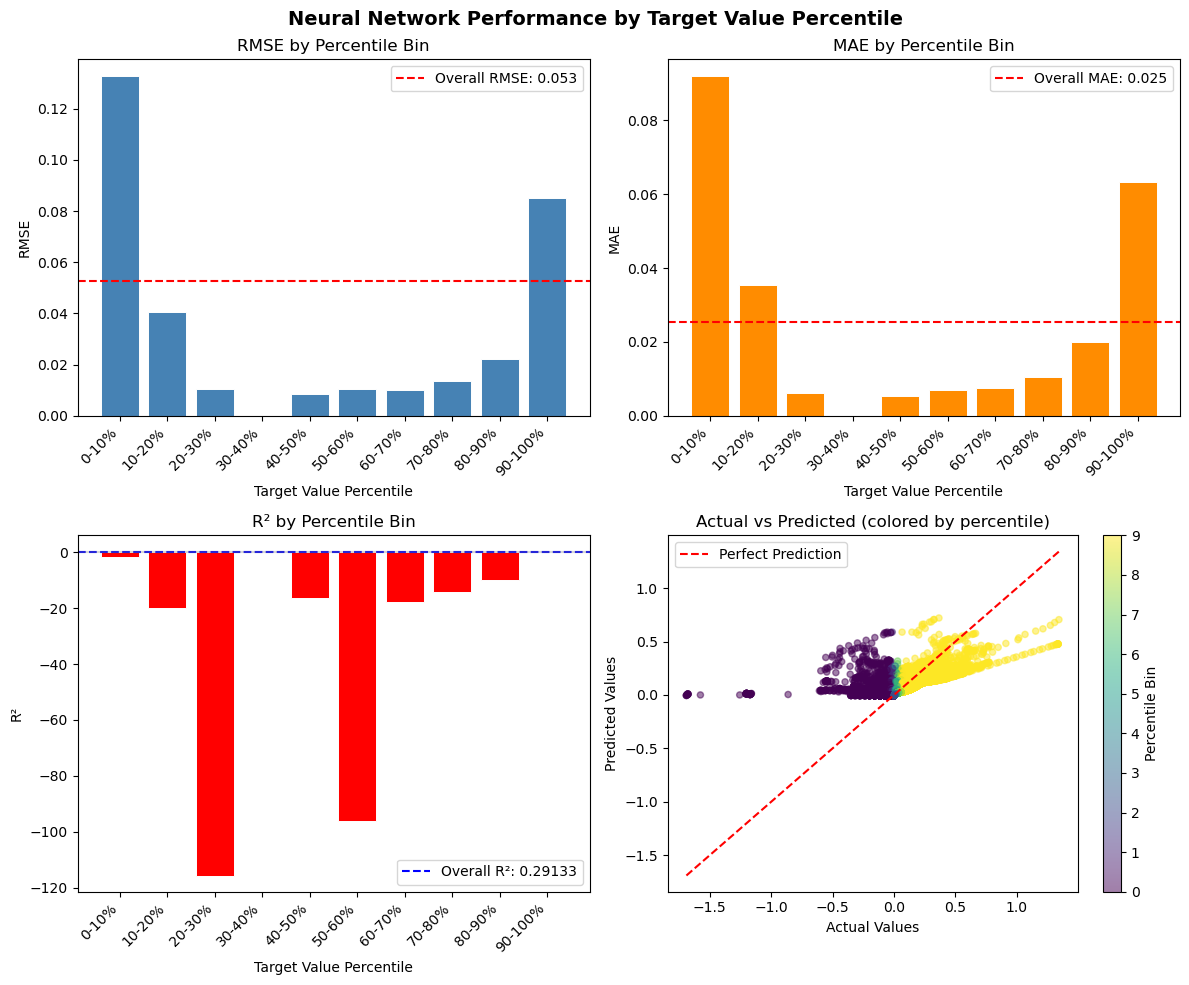


Visualization saved to 'nn_percentile_performance.png'


In [163]:
# ============================================
# Generate predictions from trained neural net
# ============================================
model.eval()
with torch.no_grad():
    preds = model(X_test_t.to("mps")).cpu().numpy().flatten()

# ============================================
# Basic metrics (same as original)
# ============================================
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f"R² score: {r2_score(y_test, preds):.3f}")
print(f"MAE: {mean_absolute_error(y_test, preds):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.3f}")

# ============================================
# Performance by percentile (uses existing function from notebook)
# ============================================
def plot_performance_by_percentile(y_test, preds, n_bins=10):
    """
    Visualize model performance across different percentile intervals of target values.
    """
    y_test = np.array(y_test)
    preds = np.array(preds)
    
    # Calculate percentile boundaries
    percentiles = np.linspace(0, 100, n_bins + 1)
    boundaries = np.percentile(y_test, percentiles)
    
    # Store metrics for each bin
    bin_labels = []
    rmse_values = []
    mae_values = []
    r2_values = []
    counts = []
    bin_centers = []
    
    for i in range(n_bins):
        if i == n_bins - 1:
            mask = (y_test >= boundaries[i]) & (y_test <= boundaries[i+1])
        else:
            mask = (y_test >= boundaries[i]) & (y_test < boundaries[i+1])
        
        y_bin = y_test[mask]
        preds_bin = preds[mask]
        
        if len(y_bin) > 1:
            rmse = np.sqrt(mean_squared_error(y_bin, preds_bin))
            mae = mean_absolute_error(y_bin, preds_bin)
            r2 = r2_score(y_bin, preds_bin) if len(y_bin) > 2 else np.nan
        else:
            rmse = mae = r2 = np.nan
        
        bin_labels.append(f"{int(percentiles[i])}-{int(percentiles[i+1])}%")
        rmse_values.append(rmse)
        mae_values.append(mae)
        r2_values.append(r2)
        counts.append(len(y_bin))
        bin_centers.append((boundaries[i] + boundaries[i+1]) / 2)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Neural Network Performance by Target Value Percentile', fontsize=14, fontweight='bold')
    
    x_pos = np.arange(n_bins)
    
    # Plot 1: RMSE by percentile
    ax1 = axes[0, 0]
    ax1.bar(x_pos, rmse_values, color='steelblue', edgecolor='white', linewidth=0.7)
    ax1.set_xlabel('Target Value Percentile')
    ax1.set_ylabel('RMSE')
    ax1.set_title('RMSE by Percentile Bin')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax1.axhline(y=np.sqrt(mean_squared_error(y_test, preds)), color='red', linestyle='--', 
                label=f'Overall RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.3f}')
    ax1.legend()
    
    # Plot 2: MAE by percentile
    ax2 = axes[0, 1]
    ax2.bar(x_pos, mae_values, color='darkorange', edgecolor='white', linewidth=0.7)
    ax2.set_xlabel('Target Value Percentile')
    ax2.set_ylabel('MAE')
    ax2.set_title('MAE by Percentile Bin')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax2.axhline(y=mean_absolute_error(y_test, preds), color='red', linestyle='--',
                label=f'Overall MAE: {mean_absolute_error(y_test, preds):.3f}')
    ax2.legend()
    
    # Plot 3: R² by percentile
    ax3 = axes[1, 0]
    colors = ['green' if v >= 0 else 'red' for v in r2_values]
    ax3.bar(x_pos, r2_values, color=colors, edgecolor='white', linewidth=0.7)
    ax3.set_xlabel('Target Value Percentile')
    ax3.set_ylabel('R²')
    ax3.set_title('R² by Percentile Bin')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax3.axhline(y=r2_score(y_test, preds), color='blue', linestyle='--',
                label=f'Overall R²: {r2_score(y_test, preds):.5f}')
    ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    ax3.legend()
    
    # Plot 4: Actual vs Predicted scatter
    ax4 = axes[1, 1]
    bin_indices = np.digitize(y_test, boundaries[1:-1])
    scatter = ax4.scatter(y_test, preds, c=bin_indices, cmap='viridis', alpha=0.5, s=20)
    min_val = min(y_test.min(), preds.min())
    max_val = max(y_test.max(), preds.max())
    ax4.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    ax4.set_xlabel('Actual Values')
    ax4.set_ylabel('Predicted Values')
    ax4.set_title('Actual vs Predicted (colored by percentile)')
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Percentile Bin')
    ax4.legend()
    
    plt.tight_layout()
    plt.savefig('nn_percentile_performance.png', dpi=150, bbox_inches='tight')
    
    # Print summary table
    print("\n" + "="*70)
    print("Neural Network Performance Metrics by Percentile Bin")
    print("="*70)
    print(f"{'Percentile':<12} {'Count':>8} {'RMSE':>10} {'MAE':>10} {'R²':>10}")
    print("-"*70)
    for i in range(n_bins):
        r2_str = f"{r2_values[i]:.3f}" if not np.isnan(r2_values[i]) else "N/A"
        print(f"{bin_labels[i]:<12} {counts[i]:>8} {rmse_values[i]:>10.3f} {mae_values[i]:>10.3f} {r2_str:>10}")
    print("-"*70)
    print(f"{'Overall':<12} {len(y_test):>8} {np.sqrt(mean_squared_error(y_test, preds)):>10.3f} "
          f"{mean_absolute_error(y_test, preds):>10.3f} {r2_score(y_test, preds):>10.3f}")
    print("="*70)
    
    return fig

# Run the visualization
print("Generating Neural Network performance visualization...")
fig = plot_performance_by_percentile(y_test_t.squeeze(), preds, n_bins=10)
plt.show()
print("\nVisualization saved to 'nn_percentile_performance.png'")

In [165]:
y_train_t.max(), y_train_t.min()

(tensor(1.7728), tensor(-2.3182))

In [162]:
y_test_t.shape

torch.Size([212790, 1])

In [159]:
preds.min(), preds.max()

(np.float32(-0.004199464), np.float32(0.72051865))

In [91]:
"""
Rigorous Regression Model Improvement Pipeline
===============================================
A systematic approach to improving neural network regression models.

Key improvements over baseline:
1. Proper time-series cross-validation (no data leakage)
2. Feature engineering and selection
3. Architecture search with hyperparameter tuning
4. Regularization strategies
5. Learning rate scheduling
6. Early stopping with patience
7. Ensemble methods
8. Comprehensive diagnostics

Modifications:
- Uses LightGBM instead of sklearn GradientBoosting
- Added tqdm progress bars throughout training/search
"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# For M3 Mac - use MPS if available
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    return torch.device("cpu")

DEVICE = get_device()
print(f"Using device: {DEVICE}")


# =============================================================================
# 1. DATA DIAGNOSTICS
# =============================================================================
class DataDiagnostics:
    """Analyze data quality and characteristics before modeling."""
    
    @staticmethod
    def run_diagnostics(X, y, feature_names=None):
        """Comprehensive data analysis."""
        print("\n" + "="*60)
        print("DATA DIAGNOSTICS")
        print("="*60)
        
        # Basic stats
        print(f"\nDataset shape: {X.shape}")
        print(f"Target range: [{y.min():.4f}, {y.max():.4f}]")
        print(f"Target mean: {y.mean():.4f}, std: {y.std():.4f}")
        
        # Check for issues
        print(f"\nMissing values in X: {np.isnan(X).sum()}")
        print(f"Missing values in y: {np.isnan(y).sum()}")
        print(f"Infinite values in X: {np.isinf(X).sum()}")
        
        # Feature correlations with target
        if feature_names is not None:
            correlations = []
            for i, name in enumerate(feature_names):
                corr = np.corrcoef(X[:, i], y)[0, 1]
                correlations.append((name, corr))
            
            correlations.sort(key=lambda x: abs(x[1]), reverse=True)
            print("\nTop 10 feature correlations with target:")
            for name, corr in correlations[:10]:
                print(f"  {name}: {corr:.4f}")
        
        # Check for multicollinearity (high VIF features)
        print("\nChecking feature variance...")
        low_var_features = np.where(X.std(axis=0) < 1e-6)[0]
        if len(low_var_features) > 0:
            print(f"  Warning: {len(low_var_features)} features have near-zero variance")
        
        # Time series stationarity hint
        if len(y) > 100:
            first_half = y[:len(y)//2]
            second_half = y[len(y)//2:]
            print(f"\nTarget drift check:")
            print(f"  First half mean: {first_half.mean():.4f}")
            print(f"  Second half mean: {second_half.mean():.4f}")
            if abs(first_half.mean() - second_half.mean()) > y.std():
                print("  Warning: Significant drift detected - consider detrending")
        
        return correlations if feature_names else None


# =============================================================================
# 2. FEATURE ENGINEERING
# =============================================================================
class FeatureEngineer:
    """Create and select features."""
    
    def __init__(self, create_interactions=True, create_polynomials=True, 
                 max_poly_degree=2, select_k_best=None):
        self.create_interactions = create_interactions
        self.create_polynomials = create_polynomials
        self.max_poly_degree = max_poly_degree
        self.select_k_best = select_k_best
        self.selected_features = None
        self.feature_names = None
    
    def fit_transform(self, X, y, feature_names=None):
        """Create and select features."""
        X_new = X.copy()
        new_names = list(feature_names) if feature_names is not None else [f"f{i}" for i in range(X.shape[1])]
        
        original_dim = X.shape[1]
        
        # Polynomial features (only for top correlated features to limit dimensionality)
        if self.create_polynomials and original_dim <= 20:
            for i in range(min(original_dim, 10)):
                for degree in range(2, self.max_poly_degree + 1):
                    X_new = np.column_stack([X_new, X[:, i] ** degree])
                    new_names.append(f"{new_names[i]}^{degree}")
        
        # Interaction features (pairwise for top features)
        if self.create_interactions and original_dim <= 20:
            for i in range(min(original_dim, 5)):
                for j in range(i + 1, min(original_dim, 5)):
                    X_new = np.column_stack([X_new, X[:, i] * X[:, j]])
                    new_names.append(f"{new_names[i]}*{new_names[j]}")
        
        # Feature selection using mutual information
        if self.select_k_best is not None and X_new.shape[1] > self.select_k_best:
            mi_scores = mutual_info_regression(X_new, y)
            top_k_idx = np.argsort(mi_scores)[-self.select_k_best:]
            self.selected_features = top_k_idx
            X_new = X_new[:, top_k_idx]
            new_names = [new_names[i] for i in top_k_idx]
        
        self.feature_names = new_names
        print(f"\nFeature engineering: {original_dim} -> {X_new.shape[1]} features")
        
        return X_new
    
    def transform(self, X):
        """Apply same transformations to new data."""
        original_dim = X.shape[1]
        X_new = X.copy()
        
        if self.create_polynomials and original_dim <= 20:
            for i in range(min(original_dim, 10)):
                for degree in range(2, self.max_poly_degree + 1):
                    X_new = np.column_stack([X_new, X[:, i] ** degree])
        
        if self.create_interactions and original_dim <= 20:
            for i in range(min(original_dim, 5)):
                for j in range(i + 1, min(original_dim, 5)):
                    X_new = np.column_stack([X_new, X[:, i] * X[:, j]])
        
        if self.selected_features is not None:
            X_new = X_new[:, self.selected_features]
        
        return X_new


# =============================================================================
# 3. IMPROVED NEURAL NETWORK ARCHITECTURES
# =============================================================================
class ImprovedBiasNet(nn.Module):
    """Enhanced network with modern techniques."""
    
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout=0.3, 
                 use_batch_norm=True, use_residual=False):
        super().__init__()
        
        self.use_residual = use_residual
        layers = []
        
        prev_dim = input_dim
        for i, hidden_dim in enumerate(hidden_dims):
            layers.append(nn.Linear(prev_dim, hidden_dim))
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.GELU())  # GELU often works better than ReLU
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim
        
        self.hidden = nn.Sequential(*layers)
        self.output = nn.Linear(hidden_dims[-1], 1)
        
        # Skip connection for residual
        if use_residual:
            self.skip = nn.Linear(input_dim, hidden_dims[-1])
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    def forward(self, x):
        h = self.hidden(x)
        if self.use_residual:
            h = h + self.skip(x)
        return self.output(h)


class AttentionBiasNet(nn.Module):
    """Network with self-attention for feature interactions."""
    
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, dropout=0.2):
        super().__init__()
        
        self.embed = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads, dropout=dropout, batch_first=True)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.ff = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        # Treat features as a sequence
        x = self.embed(x).unsqueeze(1)  # [batch, 1, hidden]
        
        # Self attention
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_out)
        
        # Feed forward
        ff_out = self.ff(x)
        x = self.norm2(x + ff_out)
        
        return self.output(x.squeeze(1))


# =============================================================================
# 4. TRAINING UTILITIES
# =============================================================================
class EarlyStopping:
    """Early stopping with patience."""
    
    def __init__(self, patience=20, min_delta=1e-5, restore_best=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best = restore_best
        self.best_loss = float('inf')
        self.best_weights = None
        self.counter = 0
        self.stopped = False
    
    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.best_weights = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.stopped = True
                if self.restore_best and self.best_weights is not None:
                    model.load_state_dict(self.best_weights)
        
        return self.stopped


class CosineAnnealingWithWarmup:
    """Learning rate scheduler with warmup."""
    
    def __init__(self, optimizer, warmup_epochs, total_epochs, min_lr=1e-6):
        self.optimizer = optimizer
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        self.min_lr = min_lr
        self.base_lr = optimizer.param_groups[0]['lr']
    
    def step(self, epoch):
        if epoch < self.warmup_epochs:
            lr = self.base_lr * (epoch + 1) / self.warmup_epochs
        else:
            progress = (epoch - self.warmup_epochs) / (self.total_epochs - self.warmup_epochs)
            lr = self.min_lr + 0.5 * (self.base_lr - self.min_lr) * (1 + np.cos(np.pi * progress))
        
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr


def train_model(model, train_loader, val_loader, epochs=100, lr=0.001, 
                weight_decay=1e-4, patience=30, device=DEVICE, verbose=True):
    """Train with all improvements and tqdm progress bar."""
    
    model = model.to(device)
    criterion = nn.HuberLoss(delta=1.0)  # More robust than MSE
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = CosineAnnealingWithWarmup(optimizer, warmup_epochs=10, total_epochs=epochs)
    early_stopping = EarlyStopping(patience=patience)
    
    train_losses = []
    val_losses = []
    
    # Create progress bar for epochs
    epoch_pbar = tqdm(range(epochs), desc="Training", disable=not verbose, 
                      unit="epoch", leave=True)
    
    for epoch in epoch_pbar:
        # Training
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            pred = model(X_batch)
            loss = criterion(pred, y_batch)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            epoch_loss += loss.item()
        
        train_loss = epoch_loss / len(train_loader)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                pred = model(X_batch)
                val_loss += criterion(pred, y_batch).item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        # Update learning rate
        scheduler.step(epoch)
        
        # Update progress bar
        epoch_pbar.set_postfix({
            'train_loss': f'{train_loss:.6f}',
            'val_loss': f'{val_loss:.6f}',
            'best_val': f'{early_stopping.best_loss:.6f}'
        })
        
        # Check early stopping
        if early_stopping(val_loss, model):
            epoch_pbar.set_description(f"Training (early stop @ {epoch+1})")
            break
    
    return model, train_losses, val_losses


# =============================================================================
# 5. CROSS-VALIDATION FOR TIME SERIES
# =============================================================================
def time_series_cv(X, y, model_fn, n_splits=5, **train_kwargs):
    """Proper time-series cross-validation with tqdm progress."""
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = {'mse': [], 'mae': [], 'r2': []}
    
    print(f"\nTime Series Cross-Validation ({n_splits} splits)")
    print("-" * 40)
    
    # Progress bar for folds
    fold_pbar = tqdm(enumerate(tscv.split(X)), total=n_splits, 
                     desc="CV Folds", unit="fold")
    
    for fold, (train_idx, val_idx) in fold_pbar:
        fold_pbar.set_description(f"CV Fold {fold + 1}/{n_splits}")
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Scale
        scaler = RobustScaler()  # More robust to outliers
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Create data loaders
        train_dataset = TensorDataset(
            torch.FloatTensor(X_train_scaled),
            torch.FloatTensor(y_train).reshape(-1, 1)
        )
        val_dataset = TensorDataset(
            torch.FloatTensor(X_val_scaled),
            torch.FloatTensor(y_val).reshape(-1, 1)
        )
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32)
        
        # Train (with reduced verbosity for CV)
        model = model_fn(X_train.shape[1])
        model, _, _ = train_model(model, train_loader, val_loader, 
                                  verbose=True, **train_kwargs)
        
        # Evaluate
        model.eval()
        with torch.no_grad():
            X_val_t = torch.FloatTensor(X_val_scaled).to(DEVICE)
            predictions = model(X_val_t).cpu().numpy().flatten()
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        cv_scores['mse'].append(mse)
        cv_scores['mae'].append(mae)
        cv_scores['r2'].append(r2)
        
        fold_pbar.set_postfix({
            'MSE': f'{mse:.6f}',
            'MAE': f'{mae:.6f}',
            'R²': f'{r2:.4f}'
        })
    
    print("\n" + "="*40)
    print("CV Summary:")
    print(f"  MSE: {np.mean(cv_scores['mse']):.6f} ± {np.std(cv_scores['mse']):.6f}")
    print(f"  MAE: {np.mean(cv_scores['mae']):.6f} ± {np.std(cv_scores['mae']):.6f}")
    print(f"  R²:  {np.mean(cv_scores['r2']):.4f} ± {np.std(cv_scores['r2']):.4f}")
    
    return cv_scores


# =============================================================================
# 6. BASELINE COMPARISONS (with LightGBM)
# =============================================================================
def compare_baselines(X_train, X_test, y_train, y_test):
    """Compare against simpler baselines including LightGBM."""
    
    print("\n" + "="*60)
    print("BASELINE COMPARISONS")
    print("="*60)
    
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    baselines = {
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.01),
        'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
        'LightGBM': LGBMRegressor(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            num_leaves=31,
            random_state=42,
            verbosity=-1,  # Suppress LightGBM output
            force_col_wise=True  # Avoid warning on small datasets
        )
    }
    
    results = {}
    
    # Progress bar for baselines
    baseline_pbar = tqdm(baselines.items(), desc="Training baselines", unit="model")
    
    for name, model in baseline_pbar:
        baseline_pbar.set_description(f"Training {name}")
        
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        results[name] = {'mse': mse, 'mae': mae, 'r2': r2}
        baseline_pbar.set_postfix({
            'MSE': f'{mse:.6f}',
            'R²': f'{r2:.4f}'
        })
    
    # Print summary
    print("\nBaseline Results:")
    for name, res in results.items():
        print(f"\n{name}:")
        print(f"  MSE: {res['mse']:.6f}, MAE: {res['mae']:.6f}, R²: {res['r2']:.4f}")
    
    return results


# =============================================================================
# 7. HYPERPARAMETER SEARCH
# =============================================================================
def hyperparameter_search(X, y, n_trials=20):
    """Simple random search for hyperparameters with tqdm progress."""
    
    print("\n" + "="*60)
    print("HYPERPARAMETER SEARCH")
    print("="*60)
    
    # Search space
    param_space = {
        'hidden_dims': [
            [64, 32],
            [128, 64],
            [128, 64, 32],
            [256, 128, 64],
            [64, 64, 64],
        ],
        'dropout': [0.1, 0.2, 0.3, 0.4],
        'lr': [0.0001, 0.0005, 0.001, 0.005],
        'weight_decay': [1e-5, 1e-4, 1e-3],
        'batch_size': [16, 32, 64, 128]
    }
    
    best_score = float('inf')
    best_params = None
    
    # Simple train/val split for search
    split_idx = int(len(X) * 0.8)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]
    
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Progress bar for trials
    trial_pbar = tqdm(range(n_trials), desc="HP Search", unit="trial")
    
    for trial in trial_pbar:
        # Random sample parameters
        params = {
            'hidden_dims': param_space['hidden_dims'][np.random.randint(len(param_space['hidden_dims']))],
            'dropout': param_space['dropout'][np.random.randint(len(param_space['dropout']))],
            'lr': param_space['lr'][np.random.randint(len(param_space['lr']))],
            'weight_decay': param_space['weight_decay'][np.random.randint(len(param_space['weight_decay']))],
            'batch_size': param_space['batch_size'][np.random.randint(len(param_space['batch_size']))]
        }
        
        # Create dataloaders
        train_dataset = TensorDataset(
            torch.FloatTensor(X_train_scaled),
            torch.FloatTensor(y_train).reshape(-1, 1)
        )
        val_dataset = TensorDataset(
            torch.FloatTensor(X_val_scaled),
            torch.FloatTensor(y_val).reshape(-1, 1)
        )
        
        train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=params['batch_size'])
        
        # Train (with reduced verbosity)
        model = ImprovedBiasNet(
            X_train.shape[1], 
            hidden_dims=params['hidden_dims'],
            dropout=params['dropout']
        )
        
        model, _, val_losses = train_model(
            model, train_loader, val_loader,
            epochs=200, lr=params['lr'], 
            weight_decay=params['weight_decay'],
            patience=20,
            verbose=False  # Suppress per-trial output
        )
        
        final_val_loss = min(val_losses)
        
        # Update progress bar
        trial_pbar.set_postfix({
            'best': f'{best_score:.6f}',
            'current': f'{final_val_loss:.6f}'
        })
        
        if final_val_loss < best_score:
            best_score = final_val_loss
            best_params = params.copy()
            trial_pbar.set_description(f"HP Search (new best @ trial {trial+1})")
    
    print(f"\nBest parameters found (val_loss={best_score:.6f}):")
    for k, v in best_params.items():
        print(f"  {k}: {v}")
    
    return best_params


# =============================================================================
# 8. ENSEMBLE
# =============================================================================
class EnsembleRegressor:
    """Ensemble of neural networks with tqdm progress."""
    
    def __init__(self, n_models=5):
        self.n_models = n_models
        self.models = []
        self.scalers = []
    
    def fit(self, X, y, model_fn, **train_kwargs):
        """Train ensemble with different random seeds."""
        
        # Progress bar for ensemble members
        ensemble_pbar = tqdm(range(self.n_models), desc="Ensemble training", 
                            unit="model")
        
        for i in ensemble_pbar:
            ensemble_pbar.set_description(f"Ensemble member {i+1}/{self.n_models}")
            
            torch.manual_seed(i * 42)
            np.random.seed(i * 42)
            
            # Bootstrap sample
            idx = np.random.choice(len(X), len(X), replace=True)
            X_boot, y_boot = X[idx], y[idx]
            
            # Split
            split_idx = int(len(X_boot) * 0.9)
            X_train, X_val = X_boot[:split_idx], X_boot[split_idx:]
            y_train, y_val = y_boot[:split_idx], y_boot[split_idx:]
            
            # Scale
            scaler = RobustScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # Data loaders
            train_dataset = TensorDataset(
                torch.FloatTensor(X_train_scaled),
                torch.FloatTensor(y_train).reshape(-1, 1)
            )
            val_dataset = TensorDataset(
                torch.FloatTensor(X_val_scaled),
                torch.FloatTensor(y_val).reshape(-1, 1)
            )
            
            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=32)
            
            # Train (with reduced verbosity)
            model = model_fn(X.shape[1])
            model, _, _ = train_model(model, train_loader, val_loader, 
                                      verbose=False, **train_kwargs)
            
            self.models.append(model)
            self.scalers.append(scaler)
            
            ensemble_pbar.set_postfix({'trained': i+1})
    
    def predict(self, X):
        """Average predictions from all models."""
        predictions = []
        
        for model, scaler in zip(self.models, self.scalers):
            X_scaled = scaler.transform(X)
            X_t = torch.FloatTensor(X_scaled).to(DEVICE)
            
            model.eval()
            with torch.no_grad():
                pred = model(X_t).cpu().numpy().flatten()
            predictions.append(pred)
        
        return np.mean(predictions, axis=0), np.std(predictions, axis=0)


# =============================================================================
# 9. MAIN IMPROVEMENT PIPELINE
# =============================================================================
def run_improvement_pipeline(df_subset, target_col='bias', exclude_cols=['bias', 'gauge_acc_in'],
                             run_hp_search=True, run_ensemble=True):
    """
    Complete improvement pipeline.
    
    Usage:
        from improve_regression_lgbm import run_improvement_pipeline
        results = run_improvement_pipeline(df_subset)
    """
    
    print("="*60)
    print("REGRESSION MODEL IMPROVEMENT PIPELINE")
    print("="*60)
    
    # Prepare data
    X = df_subset.drop(columns=exclude_cols).values
    y = df_subset[target_col].values
    feature_names = [c for c in df_subset.columns if c not in exclude_cols]
    
    # 1. Diagnostics
    DataDiagnostics.run_diagnostics(X, y, feature_names)
    
    # 2. Train/test split (time-series aware)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")
    
    # 3. Baseline comparisons (now includes LightGBM)
    baseline_results = compare_baselines(X_train, X_test, y_train, y_test)
    
    # 4. Feature engineering (optional - enable if beneficial)
    # fe = FeatureEngineer(select_k_best=30)
    # X_train = fe.fit_transform(X_train, y_train, feature_names)
    # X_test = fe.transform(X_test)
    
    # 5. Cross-validation with improved network
    def model_fn(input_dim):
        return ImprovedBiasNet(input_dim, hidden_dims=[128, 64, 32], dropout=0.3)
    
    cv_scores = time_series_cv(X_train, y_train, model_fn, n_splits=5, 
                               epochs=300, patience=25)
    
    # 6. Hyperparameter search (optional)
    if run_hp_search:
        best_params = hyperparameter_search(X_train, y_train, n_trials=15)
    else:
        best_params = {
            'hidden_dims': [128, 64, 32],
            'dropout': 0.3,
            'lr': 0.001,
            'weight_decay': 1e-4,
            'batch_size': 32
        }
    
    # 7. Train final model with best params
    print("\n" + "="*60)
    print("TRAINING FINAL MODEL")
    print("="*60)
    
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    train_dataset = TensorDataset(
        torch.FloatTensor(X_train_scaled),
        torch.FloatTensor(y_train).reshape(-1, 1)
    )
    test_dataset = TensorDataset(
        torch.FloatTensor(X_test_scaled),
        torch.FloatTensor(y_test).reshape(-1, 1)
    )
    
    train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'])
    
    final_model = ImprovedBiasNet(
        X_train.shape[1],
        hidden_dims=best_params['hidden_dims'],
        dropout=best_params['dropout']
    )
    
    final_model, train_losses, val_losses = train_model(
        final_model, train_loader, test_loader,
        epochs=500, lr=best_params['lr'],
        weight_decay=best_params['weight_decay'],
        patience=50,
        verbose=True
    )
    
    # Final evaluation
    final_model.eval()
    with torch.no_grad():
        X_test_t = torch.FloatTensor(X_test_scaled).to(DEVICE)
        final_predictions = final_model(X_test_t).cpu().numpy().flatten()
    
    final_mse = mean_squared_error(y_test, final_predictions)
    final_mae = mean_absolute_error(y_test, final_predictions)
    final_r2 = r2_score(y_test, final_predictions)
    
    print(f"\nFinal Model Performance:")
    print(f"  MSE: {final_mse:.6f}")
    print(f"  MAE: {final_mae:.6f}")
    print(f"  R²:  {final_r2:.4f}")
    
    # 8. Ensemble (optional)
    if run_ensemble:
        print("\n" + "="*60)
        print("ENSEMBLE MODEL")
        print("="*60)
        
        ensemble = EnsembleRegressor(n_models=5)
        ensemble.fit(X_train, y_train, model_fn, epochs=200, patience=20)
        
        ensemble_pred, ensemble_std = ensemble.predict(X_test)
        
        ens_mse = mean_squared_error(y_test, ensemble_pred)
        ens_mae = mean_absolute_error(y_test, ensemble_pred)
        ens_r2 = r2_score(y_test, ensemble_pred)
        
        print(f"\nEnsemble Performance:")
        print(f"  MSE: {ens_mse:.6f}")
        print(f"  MAE: {ens_mae:.6f}")
        print(f"  R²:  {ens_r2:.4f}")
        print(f"  Mean prediction uncertainty: {ensemble_std.mean():.6f}")
    
    # Summary
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print("\nModel Comparison (Test MSE):")
    for name, res in baseline_results.items():
        print(f"  {name}: {res['mse']:.6f}")
    print(f"  Neural Network: {final_mse:.6f}")
    if run_ensemble:
        print(f"  Ensemble: {ens_mse:.6f}")
    
    return {
        'baseline_results': baseline_results,
        'cv_scores': cv_scores,
        'best_params': best_params,
        'final_model': final_model,
        'final_metrics': {'mse': final_mse, 'mae': final_mae, 'r2': final_r2},
        'scaler': scaler,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# Full pipeline
results = run_improvement_pipeline(df_subset)

# Quick run (no hyperparameter search or ensemble)
results = run_improvement_pipeline(df_subset, run_hp_search=False, run_ensemble=False)

# Access results
final_model = results['final_model']
best_params = results['best_params']

Using device: mps
REGRESSION MODEL IMPROVEMENT PIPELINE

DATA DIAGNOSTICS

Dataset shape: (1063947, 35)
Target range: [-2.3182, 1.7728]
Target mean: 0.0199, std: 0.0628

Missing values in X: 0
Missing values in y: 0
Infinite values in X: 0

Top 10 feature correlations with target:
  mrms_q3evap_qpe: 0.5820
  surface_theta_e: 0.1554
  2m_above_ground_TMP: 0.1534
  DCAPE: 0.1521
  850mb_TMP: 0.1464
  LCL_height: 0.1381
  700mb_TMP: 0.1337
  700mb_DPT: 0.1262
  500mb_TMP: 0.1192
  850mb_500mb_DPT: 0.1185

Checking feature variance...

Target drift check:
  First half mean: 0.0197
  Second half mean: 0.0200

Train size: 851157, Test size: 212790

BASELINE COMPARISONS


Training LightGBM: 100%|██████████| 4/4 [00:03<00:00,  1.33model/s, MSE=0.003064, R²=0.2156]  



Baseline Results:

Ridge:
  MSE: 0.002810, MAE: 0.026558, R²: 0.2805

Lasso:
  MSE: 0.002808, MAE: 0.025747, R²: 0.2810

ElasticNet:
  MSE: 0.002800, MAE: 0.025720, R²: 0.2830

LightGBM:
  MSE: 0.003064, MAE: 0.025843, R²: 0.2156

Time Series Cross-Validation (5 splits)
----------------------------------------


CV Fold 1/5:   0%|          | 0/5 [09:56<?, ?fold/s]


KeyboardInterrupt: 